In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [22]:
# we load the data from the csv file
historical_data_btc = pd.read_csv('historical_btc.csv')
historical_data_btc['date'] = pd.to_datetime(historical_data_btc['date'])
historical_data_btc.head()

,date,btc_price
0,2009-10-05,0.000764
1,2009-10-06,0.000885
2,2009-10-07,0.001050
3,2009-10-08,0.001084
4,2009-10-09,0.001200


In [23]:
# we get the last date from the csv file and download from yahoo finance pricing since that date
last_date = historical_data_btc['date'].max()
import yfinance as yf
new_data_btc = yf.download('BTC-USD', start=last_date)
new_data_btc = new_data_btc.reset_index()
new_data_btc = new_data_btc[['Date', 'Close']]
new_data_btc.columns = ['date', 'btc_price']
new_data_btc.head()


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,date,btc_price
0,2024-05-04,63891.472656
1,2024-05-05,64031.132812
2,2024-05-06,63161.949219
3,2024-05-07,62334.816406
4,2024-05-08,61187.941406


In [199]:
# we merge the two dataframes using concat
full_data = pd.concat([historical_data_btc, new_data_btc], axis=0)
full_data = full_data.sort_values('date')
# we reset the index
full_data = full_data.reset_index(drop=False)
full_data['date'] = pd.to_datetime(full_data['date'])

full_data.tail()


,index,date,btc_price
5344,18,2024-05-22,69122.335938
5345,19,2024-05-23,67929.562500
5346,20,2024-05-24,68526.101562
5347,21,2024-05-25,69265.945312
5348,22,2024-05-26,68763.664062


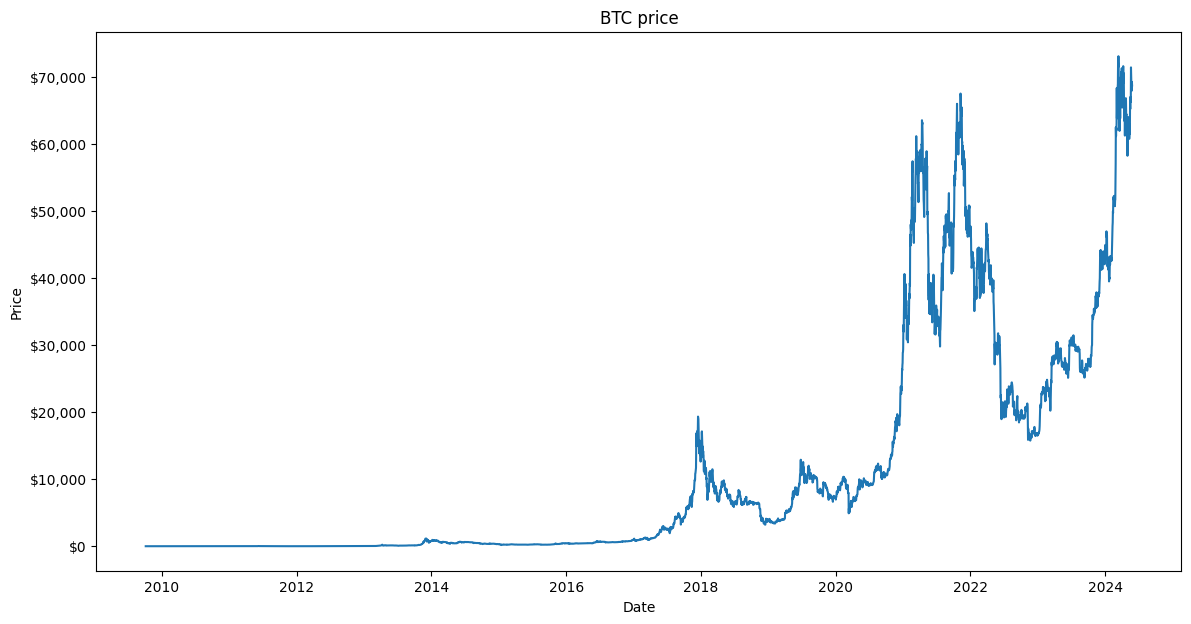

In [27]:
# we plot the data
plt.figure(figsize=(14,7))
plt.plot(full_data['date'], full_data['btc_price'])
plt.title('BTC price')
plt.xlabel('Date')
plt.ylabel('Price')
# format y axis as dollars
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()

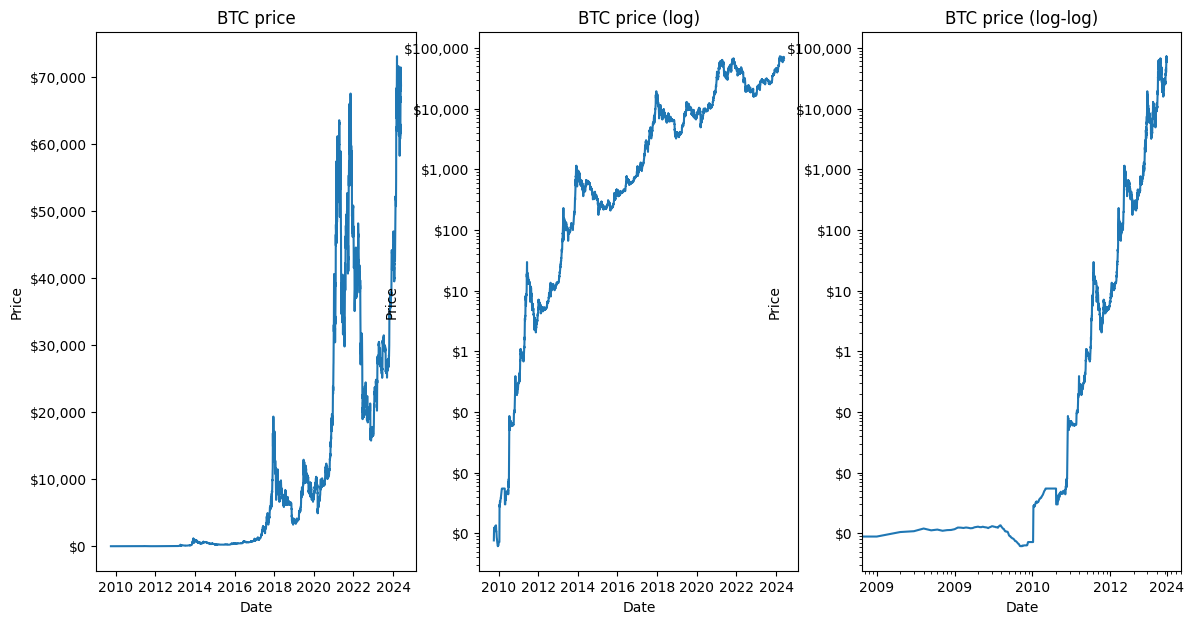

In [43]:
# we make same chart, now with three subplots. One lin lin, one lin log and one log log
fig, axs = plt.subplots(1, 3, figsize=(14,7))
axs[0].plot(full_data['date'], full_data['btc_price'])
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)

axs[1].plot(full_data['date'], full_data['btc_price'])
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')
axs[1].yaxis.set_major_formatter('${:,.0f}'.format)

# for the log log plot we use the index as x axis instead of date
axs[2].plot(full_data.index, full_data['btc_price'])
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
# for the X axis labels we use the date
# we get max INDEX from the full_data dataframe
max_index = full_data.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
# for each tick we get the date from the full_data dataframe
axs[2].set_xticklabels([full_data['date'][1].year, full_data['date'][10].year, full_data['date'][100].year, full_data['date'][1000].year, full_data['date'][max_index].year])
# we format x axis as date showing only year
# axs[2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

plt.show()




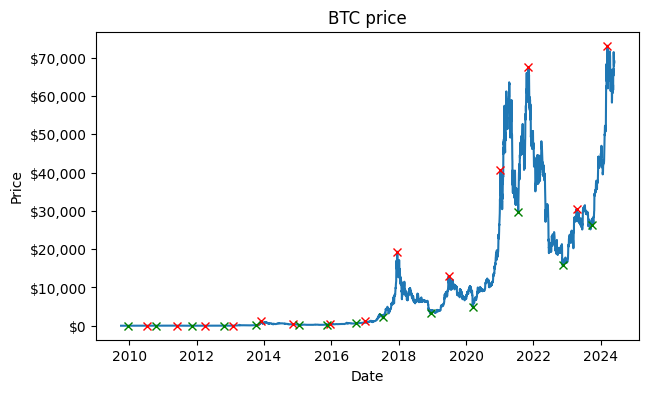

In [173]:
from scipy.signal import find_peaks
from scipy.signal import find_peaks, peak_widths
# we look for peaks and troughs that are at least d_days apart
d_days = 300
peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
plt.figure(figsize=(7,4))
plt.plot(full_data['date'], full_data['btc_price'])
plt.plot(full_data['date'][peaks], full_data['btc_price'][peaks], "x", color='red')
plt.plot(full_data['date'][troughs], full_data['btc_price'][troughs], "x", color='green')
plt.title('BTC price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()


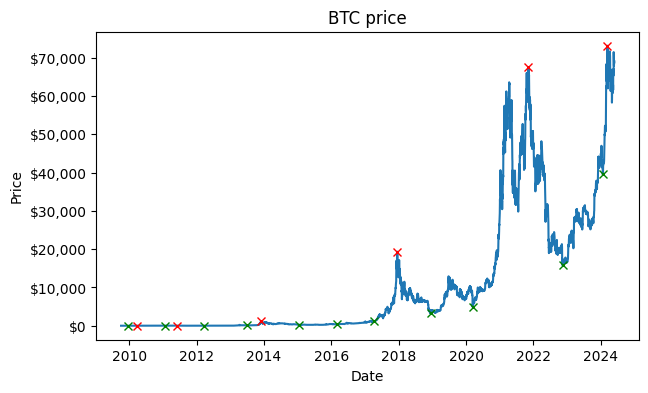

In [169]:
# for each trough, we look into the future and see if there is any trough of lower value. We keep a list of clean troughs, that contains only the throughs with no lower value in the future
# Initialize lists to store the clean troughs and peaks
clean_troughs = []
clean_peaks = []

# Iterate through the list of troughs
for i, trough in enumerate(troughs):
    # Check if there is any lower trough in the future
    if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
        clean_troughs.append(trough)

# Convert the clean troughs list to a numpy array
clean_troughs = np.array(clean_troughs)

# Iterate through the list of peaks
for i, peak in enumerate(peaks):
    # Check if there is any higher peak in the past
    if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
        clean_peaks.append(peak)

# Convert the clean peaks list to a numpy array
clean_peaks = np.array(clean_peaks)

# we plot the data with the clean peaks and troughs
plt.figure(figsize=(7,4))
plt.plot(full_data['date'], full_data['btc_price'])
plt.plot(full_data['date'][clean_peaks], full_data['btc_price'][clean_peaks], "x", color='red')
plt.plot(full_data['date'][clean_troughs], full_data['btc_price'][clean_troughs], "x", color='green')

plt.title('BTC price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()


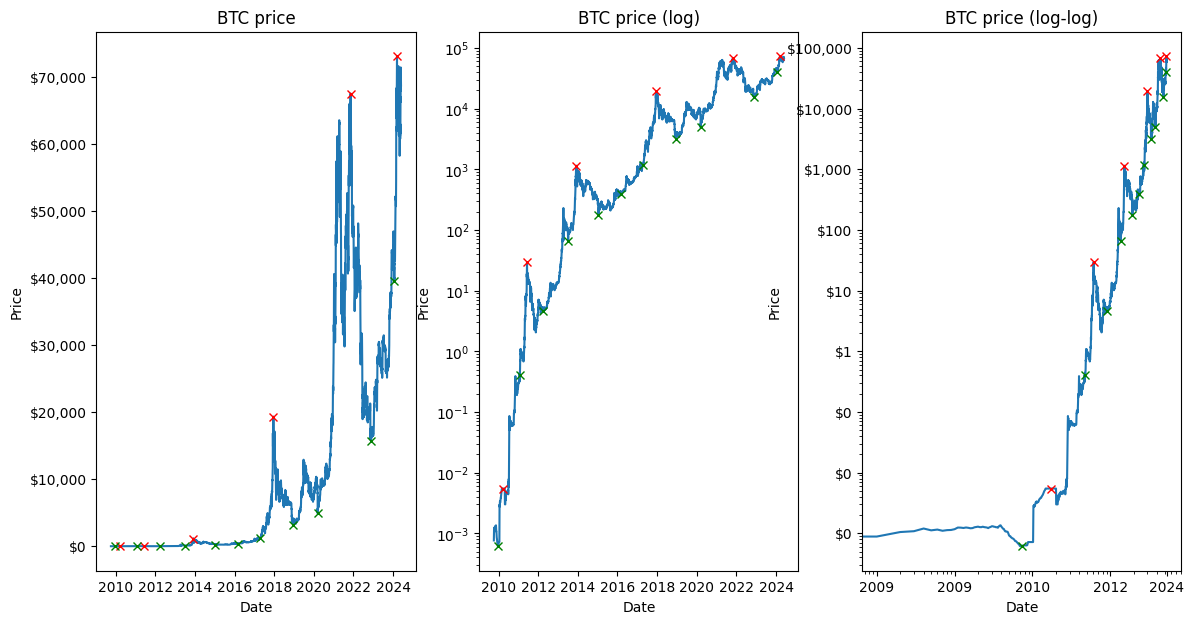

In [170]:
# we show the plot above in the normal, log and log log scales
fig, axs = plt.subplots(1, 3, figsize=(14,7))
axs[0].plot(full_data['date'], full_data['btc_price'])
axs[0].plot(full_data['date'][clean_peaks], full_data['btc_price'][clean_peaks], "x", color='red')
axs[0].plot(full_data['date'][clean_troughs], full_data['btc_price'][clean_troughs], "x", color='green')
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)

axs[1].plot(full_data['date'], full_data['btc_price'])
axs[1].plot(full_data['date'][clean_peaks], full_data['btc_price'][clean_peaks], "x", color='red')
axs[1].plot(full_data['date'][clean_troughs], full_data['btc_price'][clean_troughs], "x", color='green')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

axs[2].plot(full_data.index, full_data['btc_price'])
axs[2].plot(full_data.index[clean_peaks], full_data['btc_price'][clean_peaks], "x", color='red')
axs[2].plot(full_data.index[clean_troughs], full_data['btc_price'][clean_troughs], "x", color='green')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data['date'][1].year, full_data['date'][10].year, full_data['date'][100].year, full_data['date'][1000].year, full_data['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

plt.show()




RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

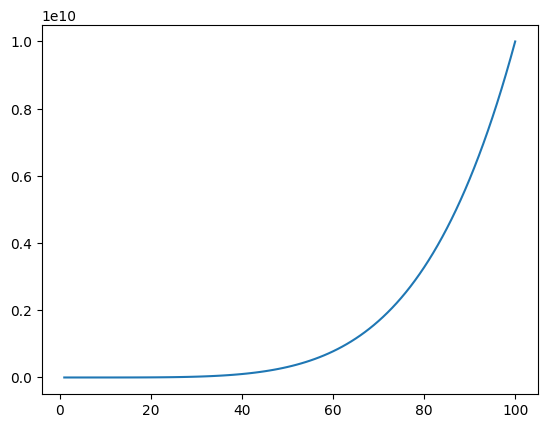

In [171]:
# we add a new column to the dataframe with a model price. The model price is a power law model that fits the troughs.
# we calculate the model price using the clean troughs
from scipy.optimize import curve_fit
# Define the power law function
def power_law(x, a, b):
    return a * x ** b

# we plot test the power law function
x = np.linspace(1, 100, 100)
y = power_law(x, 1, 5)
plt.plot(x, y)

# Fit the power law model to the clean troughs
popt, pcov = curve_fit(power_law, clean_troughs, full_data['btc_price'][clean_troughs])

# Calculate the model price using the power law function
full_data['model_price'] = power_law(full_data.index, *popt)


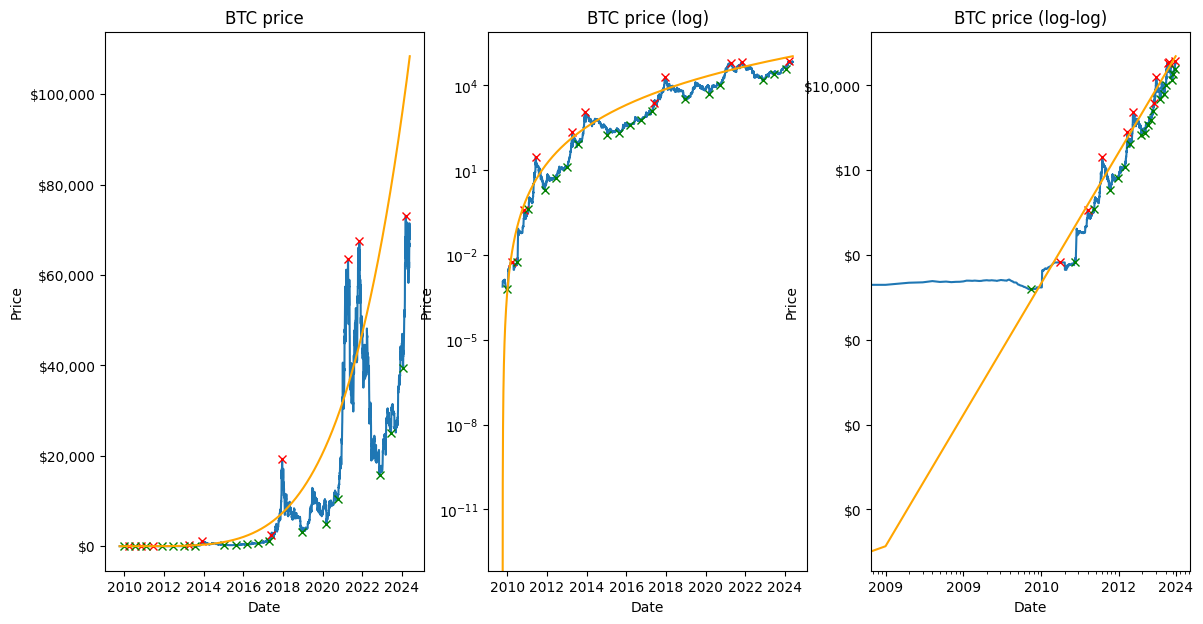

In [ ]:
# we create a new column in the dataframe with the model price with manual parameters for the power law model
full_data['model_price'] = 0.0000000000005 * full_data.index ** 4.65

# we plot the data with the clean peaks and troughs and the model price
fig, axs = plt.subplots(1, 3, figsize=(14,7))
axs[0].plot(full_data['date'], full_data['btc_price'])
axs[0].plot(full_data['date'][clean_peaks], full_data['btc_price'][clean_peaks], "x", color='red')
axs[0].plot(full_data['date'][clean_troughs], full_data['btc_price'][clean_troughs], "x", color='green')
axs[0].plot(full_data['date'], full_data['model_price'], color='orange')
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)

axs[1].plot(full_data['date'], full_data['btc_price'])

axs[1].plot(full_data['date'][clean_peaks], full_data['btc_price'][clean_peaks], "x", color='red')
axs[1].plot(full_data['date'][clean_troughs], full_data['btc_price'][clean_troughs], "x", color='green')
axs[1].plot(full_data['date'], full_data['model_price'], color='orange')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

axs[2].plot(full_data.index, full_data['btc_price'])
axs[2].plot(full_data.index[clean_peaks], full_data['btc_price'][clean_peaks], "x", color='red')
axs[2].plot(full_data.index[clean_troughs], full_data['btc_price'][clean_troughs], "x", color='green')
axs[2].plot(full_data.index, full_data['model_price'], color='orange')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data['date'][1].year, full_data['date'][10].year, full_data['date'][100].year, full_data['date'][1000].year, full_data['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

plt.show()


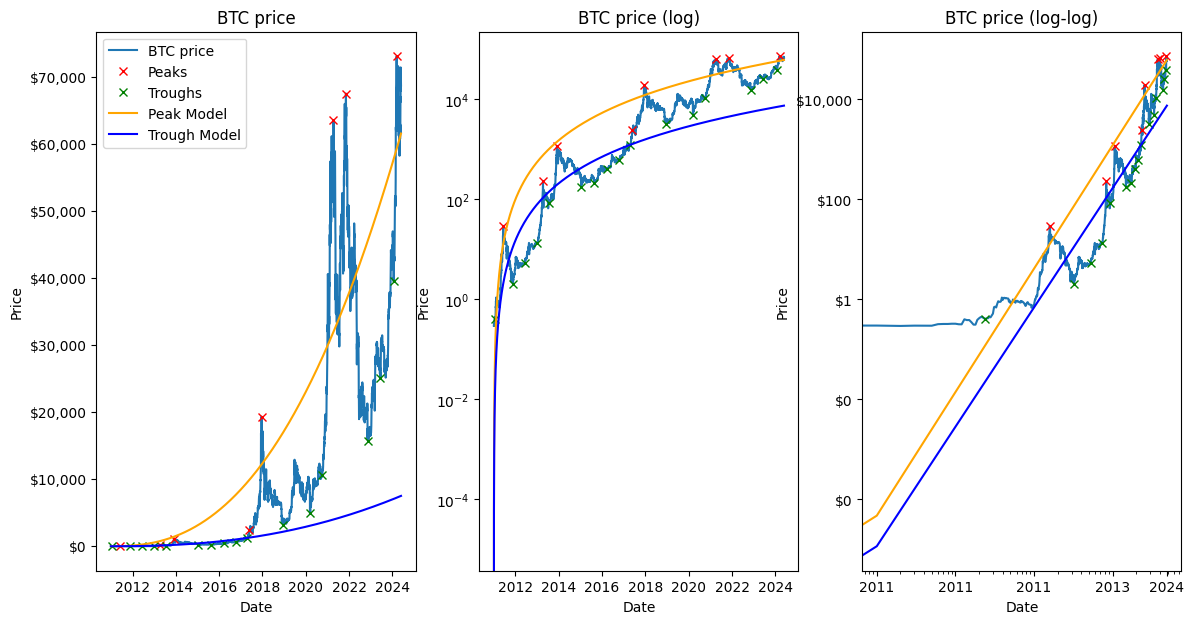

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2010
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# we substract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# we reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=False)



# Prepare data for log-log regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Convert to log-log space
log_peak_dates = np.log(peak_dates)
log_peak_prices = np.log(peak_prices)
log_trough_dates = np.log(trough_dates)
log_trough_prices = np.log(trough_prices)

# Perform linear regression in log-log space
peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

# Create model prices based on fitted parameters
full_data_after_2011['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_2011.index ** peak_model_params[0]
full_data_after_2011['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_2011.index ** trough_model_params[0]

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

plt.show()


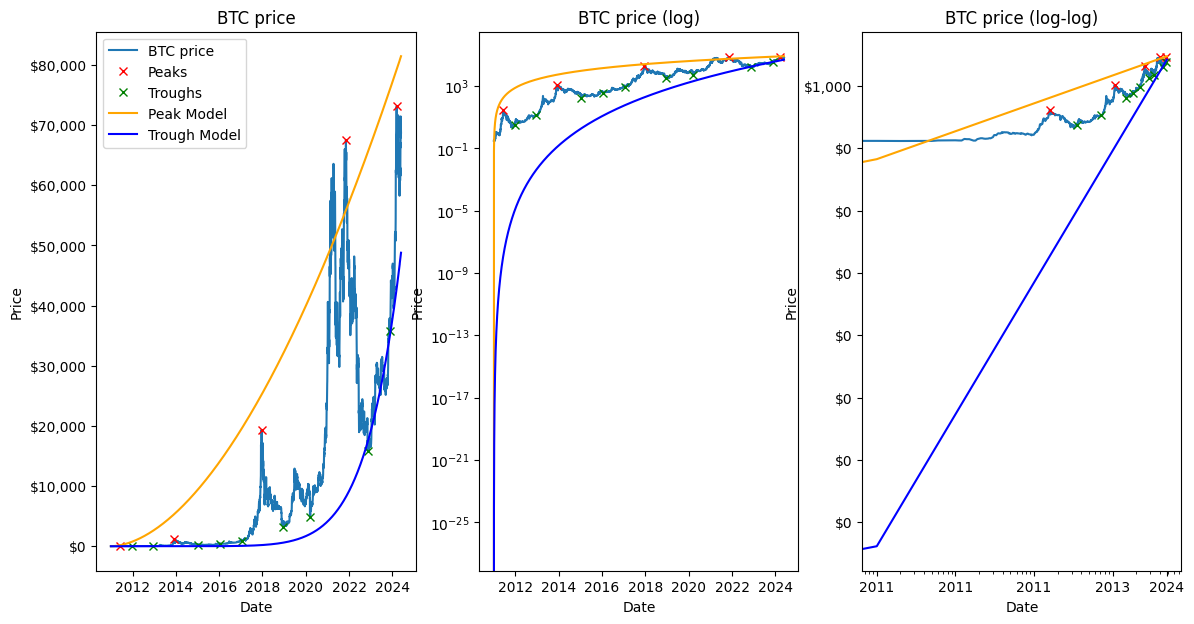

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2010
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Define the power law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the power law model to the peaks
popt_peaks, _ = curve_fit(power_law, peak_dates, peak_prices, maxfev=20000)
full_data_after_2011['model_price_peaks'] = power_law(full_data_after_2011.index, *popt_peaks)

# Fit the power law model to the troughs
popt_troughs, _ = curve_fit(power_law, trough_dates, trough_prices, maxfev=20000)
full_data_after_2011['model_price_troughs'] = power_law(full_data_after_2011.index, *popt_troughs)

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

plt.show()


In [ ]:
# we print the parameters of the power law model for the peaks and troughs
print('Peak Model Parameters:', popt_peaks)
print('Trough Model Parameters:', popt_troughs)


Peak Model Parameters: [0.02016653 1.79043851]
Trough Model Parameters: [2.90149205e-27 8.46281688e+00]


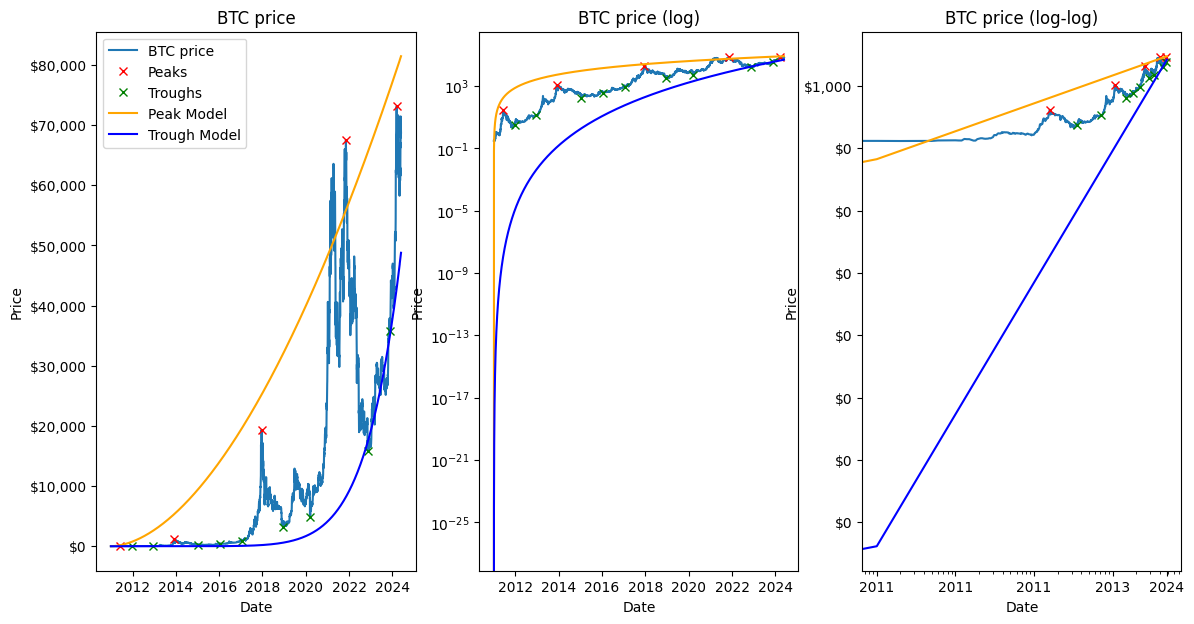

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2010
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Define the power law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Use robust optimization for the power law model to the peaks
def residuals_peaks(params, x, y):
    return y - power_law(x, params[0], params[1])

initial_guess_peaks = [1e-8, 3]
res_peaks = least_squares(residuals_peaks, initial_guess_peaks, args=(peak_dates, peak_prices), max_nfev=10000)
popt_peaks = res_peaks.x
full_data_after_2011['model_price_peaks'] = power_law(full_data_after_2011.index, *popt_peaks)

# Use robust optimization for the power law model to the troughs
def residuals_troughs(params, x, y):
    return y - power_law(x, params[0], params[1])

initial_guess_troughs = [1e-10, 2]
res_troughs = least_squares(residuals_troughs, initial_guess_troughs, args=(trough_dates, trough_prices), max_nfev=10000)
popt_troughs = res_troughs.x
full_data_after_2011['model_price_troughs'] = power_law(full_data_after_2011.index, *popt_troughs)

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

plt.show()


Peak Model Parameters: [  4.04441215 -22.66995296]
Trough Model Parameters: [  4.4394938  -27.96464182]


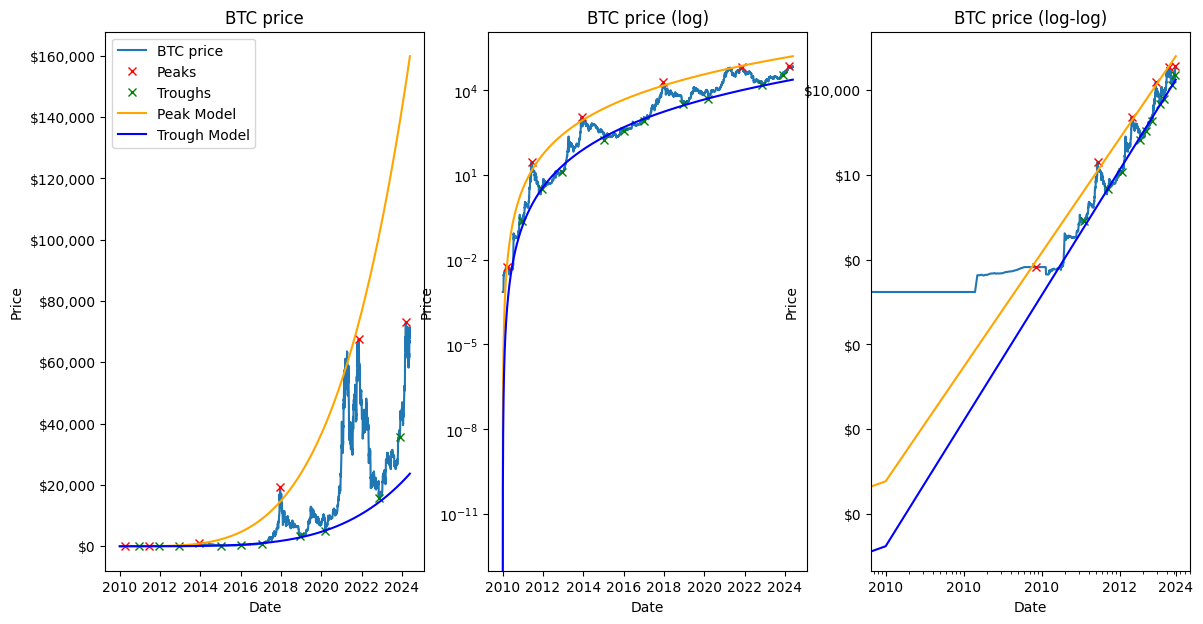

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2009
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Convert to log-log space
log_peak_dates = np.log(peak_dates)
log_peak_prices = np.log(peak_prices)
log_trough_dates = np.log(trough_dates)
log_trough_prices = np.log(trough_prices)

# Perform linear regression in log-log space
peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

# Create model prices based on fitted parameters
full_data_after_2011['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_2011.index ** peak_model_params[0]
full_data_after_2011['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_2011.index ** trough_model_params[0]

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)
# we print parameters of the power law model for the peaks and troughs
print('Peak Model Parameters:', peak_model_params)
print('Trough Model Parameters:', trough_model_params)

plt.show()


Peak Model Parameters: [  3.70190698 -19.79248727]
Trough Model Parameters: [  4.4394938  -27.96464182]


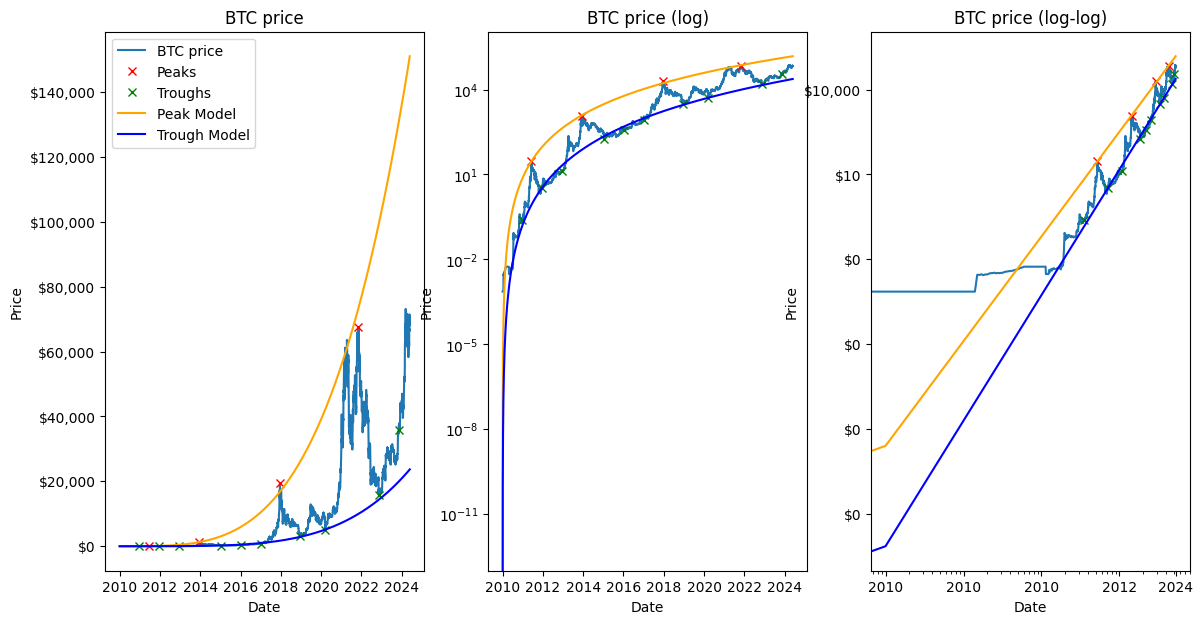

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2009
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# Drop the first and last peaks
clean_peaks_after_2011 = clean_peaks_after_2011[1:-1]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Convert to log-log space
log_peak_dates = np.log(peak_dates)
log_peak_prices = np.log(peak_prices)
log_trough_dates = np.log(trough_dates)
log_trough_prices = np.log(trough_prices)

# Perform linear regression in log-log space
peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

# Create model prices based on fitted parameters
full_data_after_2011['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_2011.index ** peak_model_params[0]
full_data_after_2011['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_2011.index ** trough_model_params[0]

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)
# we print parameters of the power law model for the peaks and troughs
print('Peak Model Parameters:', peak_model_params)
print('Trough Model Parameters:', trough_model_params)

plt.show()


Peak Model Parameters: [  3.70190698 -19.79248727]
Trough Model Parameters: [  4.33398177 -27.2399963 ]
R² for Peaks: 0.9863
R² for Troughs: 0.9380


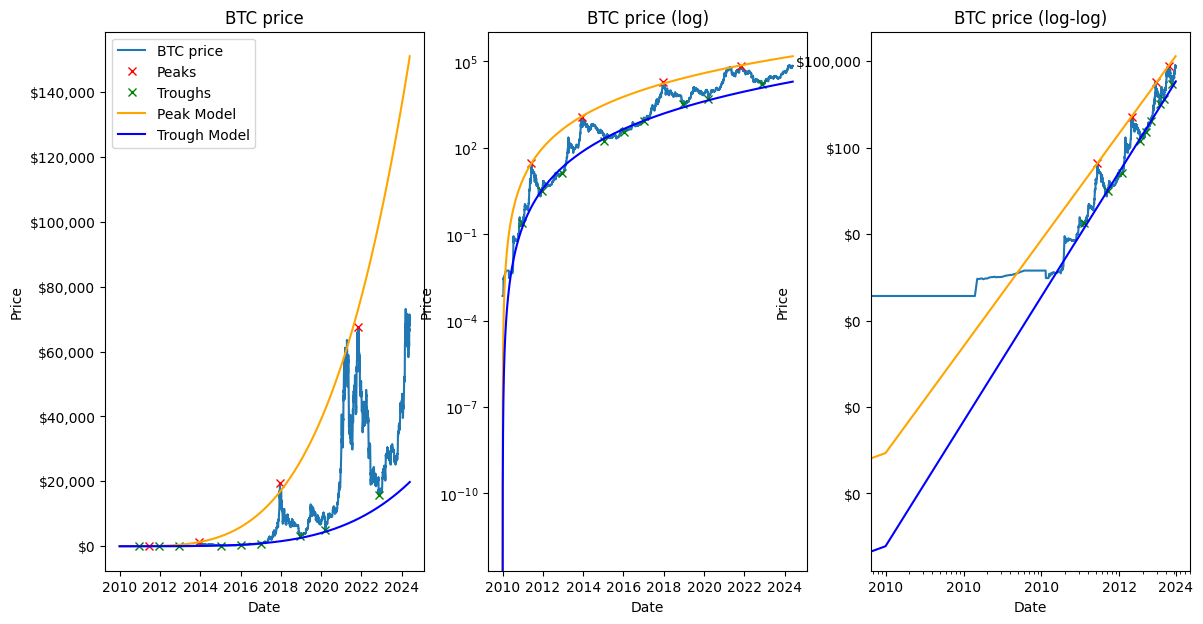

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2009
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# Drop the first and last peaks
clean_peaks_after_2011 = clean_peaks_after_2011[1:-1]

# drop the last trough
clean_troughs_after_2011 = clean_troughs_after_2011[:-1]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Convert to log-log space
log_peak_dates = np.log(peak_dates)
log_peak_prices = np.log(peak_prices)
log_trough_dates = np.log(trough_dates)
log_trough_prices = np.log(trough_prices)

# Perform linear regression in log-log space
peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

# Create model prices based on fitted parameters
full_data_after_2011['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_2011.index ** peak_model_params[0]
full_data_after_2011['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_2011.index ** trough_model_params[0]

# Calculate R² for peaks
peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

# Calculate R² for troughs
trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

# Print model parameters and R²
print('Peak Model Parameters:', peak_model_params)
print('Trough Model Parameters:', trough_model_params)
print(f'R² for Peaks: {r2_peaks:.4f}')
print(f'R² for Troughs: {r2_troughs:.4f}')

plt.show()


Peak Model Parameters: [  3.70190698 -19.79248727]
Trough Model Parameters: [  4.33398177 -27.2399963 ]
R² for Peaks: 0.9863
R² for Troughs: 0.9380


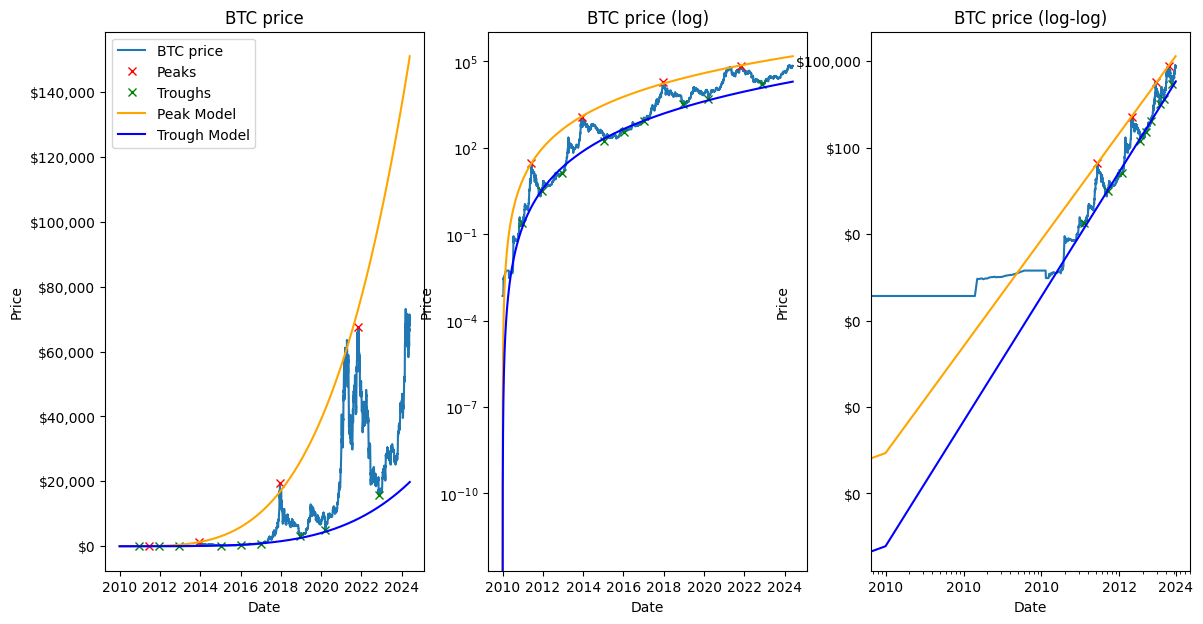

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2009
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# Drop the first and last peaks
clean_peaks_after_2011 = clean_peaks_after_2011[1:-1]

# drop the last trough
clean_troughs_after_2011 = clean_troughs_after_2011[:-1]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Convert to log-log space
log_peak_dates = np.log(peak_dates)
log_peak_prices = np.log(peak_prices)
log_trough_dates = np.log(trough_dates)
log_trough_prices = np.log(trough_prices)

# Perform linear regression in log-log space
peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

# Create model prices based on fitted parameters
full_data_after_2011['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_2011.index ** peak_model_params[0]
full_data_after_2011['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_2011.index ** trough_model_params[0]

# Calculate R² for peaks
peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

# Calculate R² for troughs
trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

# Print model parameters and R²
print('Peak Model Parameters:', peak_model_params)
print('Trough Model Parameters:', trough_model_params)
print(f'R² for Peaks: {r2_peaks:.4f}')
print(f'R² for Troughs: {r2_troughs:.4f}')

plt.show()


Peak Model Parameters: [  3.95680839 -21.95847309]
Trough Model Parameters: [  4.12585708 -25.74981651]
R² for Peaks: 0.9674
R² for Troughs: 0.8436


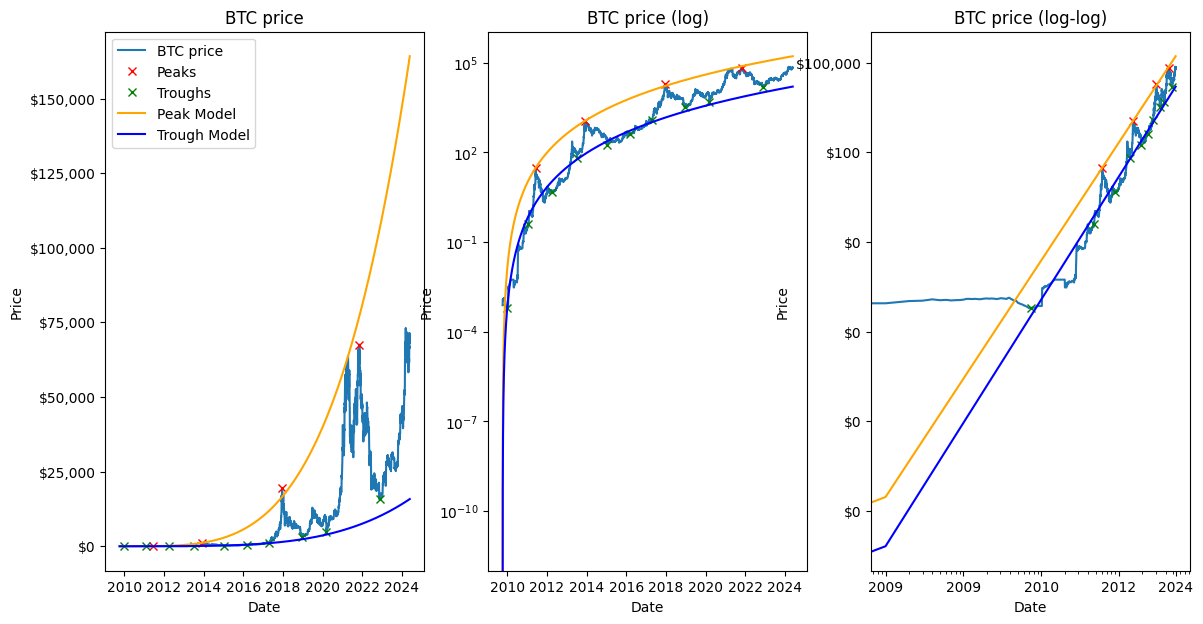

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2008
# Filter data to include only entries after 2011
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2011
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2011 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# Drop the first and last peaks
clean_peaks_after_2011 = clean_peaks_after_2011[1:-1]

# drop the last trough
clean_troughs_after_2011 = clean_troughs_after_2011[:-1]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Convert to log-log space
log_peak_dates = np.log(peak_dates)
log_peak_prices = np.log(peak_prices)
log_trough_dates = np.log(trough_dates)
log_trough_prices = np.log(trough_prices)

# Perform linear regression in log-log space
peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

# Create model prices based on fitted parameters
full_data_after_2011['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_2011.index ** peak_model_params[0]
full_data_after_2011['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_2011.index ** trough_model_params[0]

# Calculate R² for peaks
peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

# Calculate R² for troughs
trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

# Print model parameters and R²
print('Peak Model Parameters:', peak_model_params)
print('Trough Model Parameters:', trough_model_params)
print(f'R² for Peaks: {r2_peaks:.4f}')
print(f'R² for Troughs: {r2_troughs:.4f}')

plt.show()


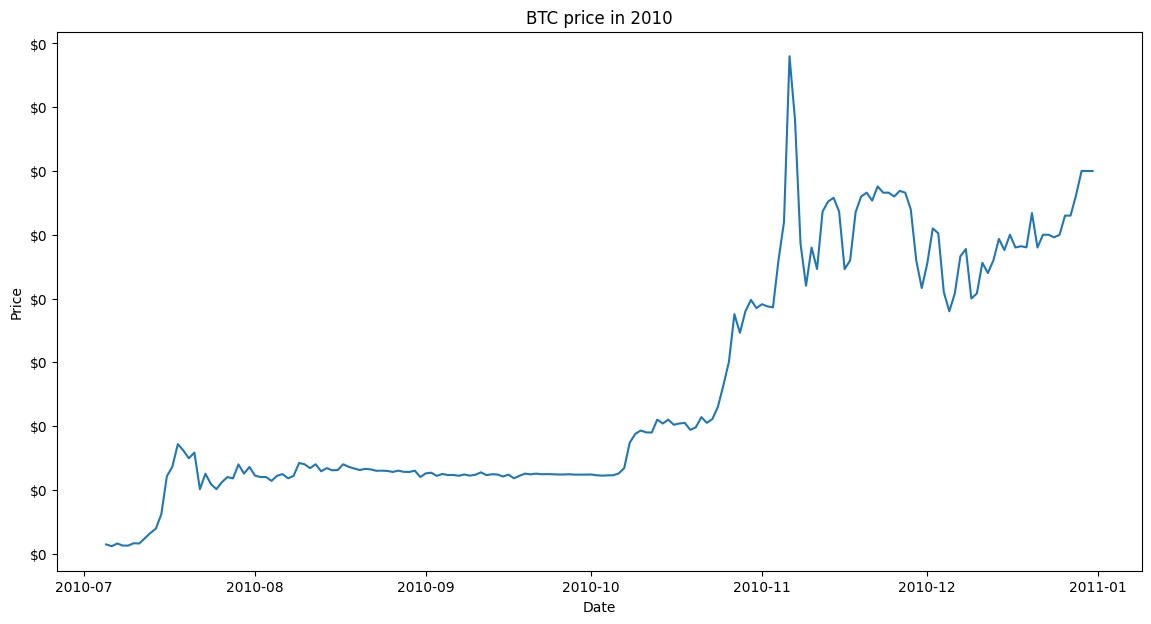

In [176]:
# we plot btc price just for year 2010. Literally just want to plot the price for last six months of 2010

t_2010_data = full_data[full_data['date'].dt.year == 2010].iloc[-180:]

plt.figure(figsize=(14, 7))
plt.plot(t_2010_data['date'], t_2010_data['btc_price'])
plt.title('BTC price in 2010')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
plt.show()






Peak Model Parameters: [  3.95680839 -21.95847309]
Trough Model Parameters: [  4.16452009 -26.07303706]
R² for Peaks: 0.9674
R² for Troughs: 0.8497


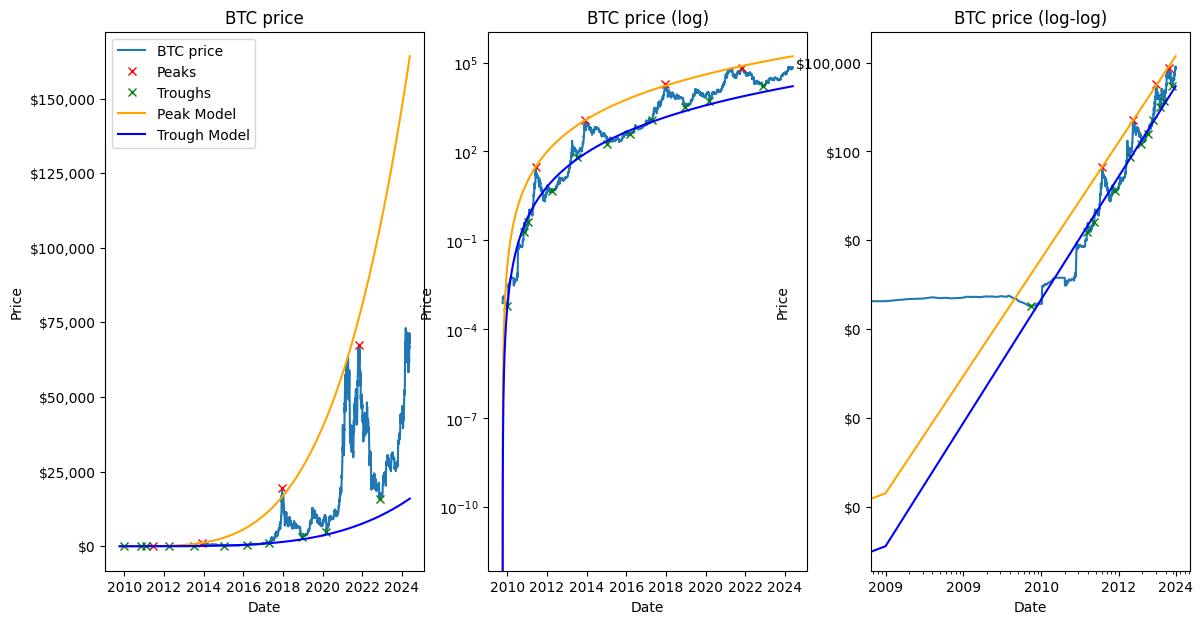

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your full_data DataFrame here
# full_data = pd.read_csv('your_data_file.csv')  # Example for loading data

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2008
# Filter data to include only entries after 2008
full_data_after_2011 = full_data[full_data['date'].dt.year > min_year]

# Filter the peaks and troughs to include only those after 2008
clean_peaks_after_2011 = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
clean_troughs_after_2011 = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]

# We subtract the removed dates from start to 2008 to replace the indices
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]
clean_peaks_after_2011 = [peak - removed_dates for peak in clean_peaks_after_2011]
clean_troughs_after_2011 = [trough - removed_dates for trough in clean_troughs_after_2011]

# Set a single trough point in 2010 at the value of November 1st, 2010
nov_1_2010_index = full_data[full_data['date'] == '2010-11-01'].index[0] - removed_dates
clean_troughs_after_2011 = [nov_1_2010_index] + [trough for trough in clean_troughs_after_2011 if full_data_after_2011['date'][trough].year != 2010]

# Drop the first and last peaks
clean_peaks_after_2011 = clean_peaks_after_2011[1:-1]

# Drop the last trough
clean_troughs_after_2011 = clean_troughs_after_2011[:-1]

# We reset all indices to avoid problems
full_data_after_2011 = full_data_after_2011.reset_index(drop=True)

# Prepare data for regression for peaks and troughs
peak_dates = full_data_after_2011.index[clean_peaks_after_2011]
peak_prices = full_data_after_2011['btc_price'].iloc[clean_peaks_after_2011]

trough_dates = full_data_after_2011.index[clean_troughs_after_2011]
trough_prices = full_data_after_2011['btc_price'].iloc[clean_troughs_after_2011]

# Convert to log-log space
log_peak_dates = np.log(peak_dates)
log_peak_prices = np.log(peak_prices)
log_trough_dates = np.log(trough_dates)
log_trough_prices = np.log(trough_prices)

# Perform linear regression in log-log space
peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

# Create model prices based on fitted parameters
full_data_after_2011['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_2011.index ** peak_model_params[0]
full_data_after_2011['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_2011.index ** trough_model_params[0]

# Calculate R² for peaks
peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

# Calculate R² for troughs
trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)

# Plotting the data with the clean peaks and troughs and the model prices
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

# Original price
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'], label='BTC price')

# Peaks and troughs
axs[0].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red', label='Peaks')
axs[0].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green', label='Troughs')

# Model prices
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange', label='Peak Model')
axs[0].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue', label='Trough Model')

# Labels and formatting
axs[0].set_title('BTC price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
axs[0].legend()

# Log scale
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['btc_price'])
axs[1].plot(full_data_after_2011['date'].iloc[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[1].plot(full_data_after_2011['date'].iloc[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_peaks'], color='orange')
axs[1].plot(full_data_after_2011['date'], full_data_after_2011['model_price_troughs'], color='blue')
axs[1].set_title('BTC price (log)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].set_yscale('log')

# Log-log scale
axs[2].plot(full_data_after_2011.index, full_data_after_2011['btc_price'])
axs[2].plot(full_data_after_2011.index[clean_peaks_after_2011], peak_prices, "x", color='red')
axs[2].plot(full_data_after_2011.index[clean_troughs_after_2011], trough_prices, "x", color='green')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_peaks'], color='orange')
axs[2].plot(full_data_after_2011.index, full_data_after_2011['model_price_troughs'], color='blue')
axs[2].set_title('BTC price (log-log)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
max_index = full_data_after_2011.index.max()
axs[2].set_xticks([1, 10, 100, 1000, max_index])
axs[2].set_xticklabels([full_data_after_2011['date'][1].year, full_data_after_2011['date'][10].year, full_data_after_2011['date'][100].year, full_data_after_2011['date'][1000].year, full_data_after_2011['date'][max_index].year])
axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

# Print model parameters and R²
print('Peak Model Parameters:', peak_model_params)
print('Trough Model Parameters:', trough_model_params)
print(f'R² for Peaks: {r2_peaks:.4f}')
print(f'R² for Troughs: {r2_troughs:.4f}')

plt.show()


In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def get_peaks(full_data, min_year, removed_dates, d_days):
    peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
    clean_peaks = []
    for i, peak in enumerate(peaks):
        # Check if there is any higher peak in the past
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            clean_peaks.append(peak)

    # Convert the clean peaks list to a numpy array
    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2010-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    clean_peaks_after_year = clean_peaks_after_year[:-1]  # Drop the first and last peaks
    return clean_peaks_after_year

def get_troughs(full_data, min_year, removed_dates, d_days):
    # print('full_data:', full_data['date'])
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        # Check if there is any lower trough in the future
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    # Convert the clean troughs list to a numpy array
    clean_troughs = np.array(clean_troughs)
    # if min_year is 2009, we need to filter out the troughs before nov 1, 2010, otherwise we just filter out just after min_year
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-06-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    
    clean_troughs_after_year = clean_troughs_after_year[:-1]  # Drop the last trough
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]
    # Convert to log-log space
    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    # Perform linear regression in log-log space
    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    # Create model prices based on fitted parameters
    full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
    full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

    # Calculate R² for peaks
    peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
    SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
    SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
    r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

    # Calculate R² for troughs
    trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
    SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
    SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
    r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)
    return peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)
    
    # Print model parameters and R²
    print('Peak Model Parameters:', peak_model_params)
    print('Trough Model Parameters:', trough_model_params)
    print(f'R² for Peaks: {r2_peaks:.4f}')
    print(f'R² for Troughs: {r2_troughs:.4f}')

    # Plotting the data with the clean peaks and troughs and the model prices
    fig, axs = plt.subplots(1, 3, figsize=(14, 7))

    # Original price
    axs[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')

    # Peaks and troughs
    axs[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axs[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')

    # Model prices
    axs[0].plot(full_data_after_year['date'], full_data_after_year['model_price_peaks'], color='orange', label='Peak Model')
    axs[0].plot(full_data_after_year['date'], full_data_after_year['model_price_troughs'], color='blue', label='Trough Model')

    # Labels and formatting
    axs[0].set_title('BTC price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axs[0].legend()

    # Log scale
    axs[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axs[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[1].plot(full_data_after_year['date'], full_data_after_year['model_price_peaks'], color='orange')
    axs[1].plot(full_data_after_year['date'], full_data_after_year['model_price_troughs'], color='blue')
    axs[1].set_title('BTC price (log)')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price')
    axs[1].set_yscale('log')

    # Log-log scale
    axs[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axs[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[2].plot(full_data_after_year.index, full_data_after_year['model_price_peaks'], color='orange')
    axs[2].plot(full_data_after_year.index, full_data_after_year['model_price_troughs'], color='blue')
    axs[2].set_title('BTC price (log-log)')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Price')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    max_index = full_data_after_year.index.max()
    axs[2].set_xticks([1, 10, 100, 1000, max_index])
    axs[2].set_xticklabels([full_data_after_year['date'][1].year, full_data_after_year['date'][10].year, full_data_after_year['date'][100].year, full_data_after_year['date'][1000].year, full_data_after_year['date'][max_index].year])
    axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

    plt.show()


Peak Model Parameters: [  3.95680839 -21.95847309]
Trough Model Parameters: [  4.68768382 -30.19904542]
R² for Peaks: 0.9674
R² for Troughs: 0.9794


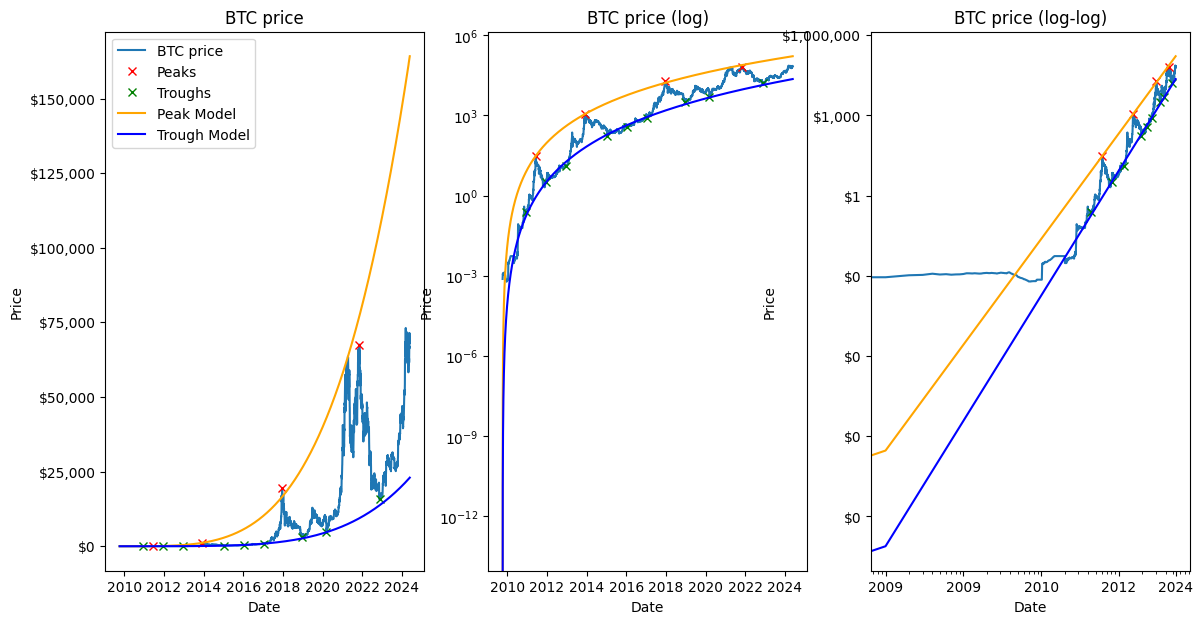

In [230]:

min_year = 2005
d_days = 365

full_data_after_year = full_data[full_data['date'].dt.year > min_year]
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]

# Get peaks and troughs
clean_peaks_after_year = get_peaks(full_data, min_year, removed_dates, d_days)
clean_troughs_after_year = get_troughs(full_data, min_year, removed_dates, d_days)

# Generate figure
get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)


Peak Model Parameters: [  3.95680839 -21.95847309]
Trough Model Parameters: [  4.68768382 -30.19904542]
R² for Peaks: 0.9674
R² for Troughs: 0.9794


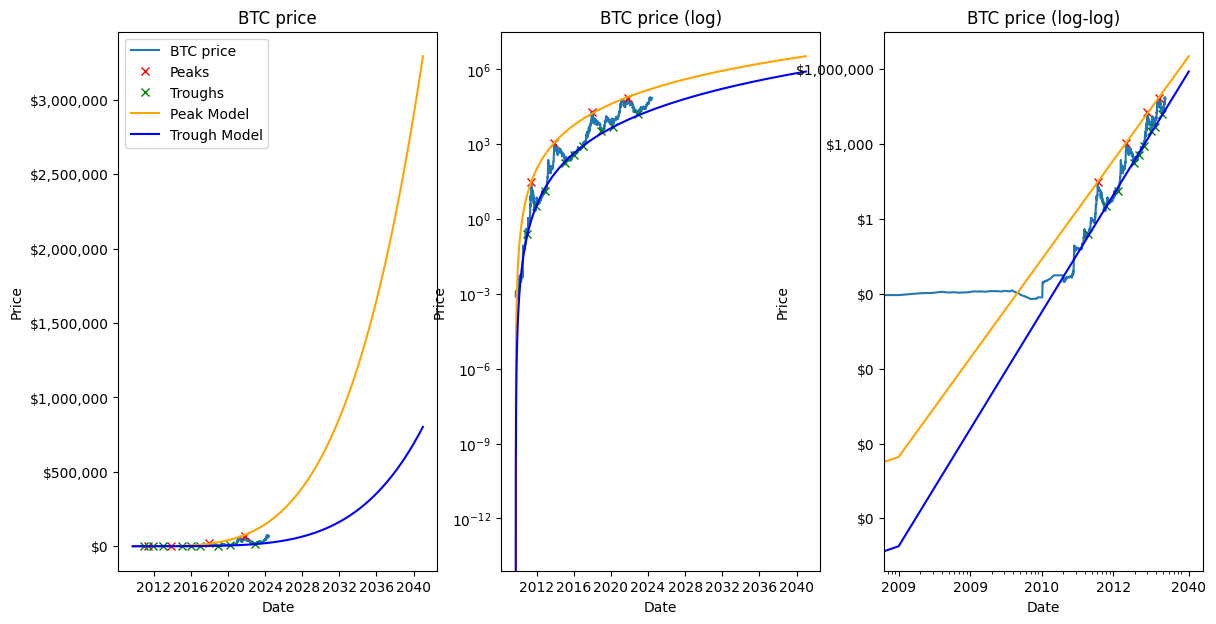

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

def get_peaks(full_data, min_year, removed_dates, d_days):
    peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
    clean_peaks = []
    for i, peak in enumerate(peaks):
        # Check if there is any higher peak in the past
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            clean_peaks.append(peak)

    # Convert the clean peaks list to a numpy array
    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2010-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    clean_peaks_after_year = clean_peaks_after_year[:-1]  # Drop the first and last peaks
    return clean_peaks_after_year

def get_troughs(full_data, min_year, removed_dates, d_days):
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        # Check if there is any lower trough in the future
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    # Convert the clean troughs list to a numpy array
    clean_troughs = np.array(clean_troughs)
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-06-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    clean_troughs_after_year = clean_troughs_after_year[:-1]  # Drop the last trough
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]

    # Convert to log-log space
    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    # Perform linear regression in log-log space
    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    # Create model prices based on fitted parameters
    full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
    full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

    # Calculate R² for peaks
    peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
    SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
    SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
    r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

    # Calculate R² for troughs
    trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
    SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
    SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
    r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)
    return peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year):
    peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)
    
    # Extend dates to max_year
    future_dates = pd.date_range(start=full_data_after_year['date'].iloc[-1], end=str(max_year)+'-12-31', freq='D')
    future_index = range(len(full_data_after_year), len(full_data_after_year) + len(future_dates))

    # Create future model prices based on fitted parameters
    future_model_price_peaks = np.exp(peak_model_params[1]) * np.array(future_index) ** peak_model_params[0]
    future_model_price_troughs = np.exp(trough_model_params[1]) * np.array(future_index) ** trough_model_params[0]

    # Combine past and future data for plotting
    combined_dates = pd.concat([full_data_after_year['date'], pd.Series(future_dates)])
    combined_model_price_peaks = np.concatenate([full_data_after_year['model_price_peaks'], future_model_price_peaks])
    combined_model_price_troughs = np.concatenate([full_data_after_year['model_price_troughs'], future_model_price_troughs])

    # Print model parameters and R²
    print('Peak Model Parameters:', peak_model_params)
    print('Trough Model Parameters:', trough_model_params)
    print(f'R² for Peaks: {r2_peaks:.4f}')
    print(f'R² for Troughs: {r2_troughs:.4f}')

    # Plotting the data with the clean peaks and troughs and the model prices
    fig, axs = plt.subplots(1, 3, figsize=(14, 7))

    # Original price
    axs[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')

    # Peaks and troughs
    axs[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axs[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')

    # Model prices
    axs[0].plot(combined_dates, combined_model_price_peaks, color='orange', label='Peak Model')
    axs[0].plot(combined_dates, combined_model_price_troughs, color='blue', label='Trough Model')

    # Labels and formatting
    axs[0].set_title('BTC price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axs[0].legend()

    # Log scale
    axs[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axs[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[1].plot(combined_dates, combined_model_price_peaks, color='orange')
    axs[1].plot(combined_dates, combined_model_price_troughs, color='blue')
    axs[1].set_title('BTC price (log)')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price')
    axs[1].set_yscale('log')

    # Log-log scale
    axs[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axs[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_peaks, color='orange')
    axs[2].plot(range(len(combined_dates)), combined_model_price_troughs, color='blue')
    axs[2].set_title('BTC price (log-log)')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Price')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    max_index = len(combined_dates) - 1
    axs[2].set_xticks([1, 10, 100, 1000, max_index])
    axs[2].set_xticklabels([full_data_after_year['date'][1].year, full_data_after_year['date'][10].year, full_data_after_year['date'][100].year, full_data_after_year['date'][1000].year, combined_dates.iloc[max_index].year])
    axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

    plt.show()

# Example usage
# full_data = pd.read_csv('path_to_your_data.csv')
# clean_peaks = [...]  # List of peak indices
# clean_troughs = [...]  # List of trough indices

# Ensure 'date' column is in datetime format
full_data['date'] = pd.to_datetime(full_data['date'])

min_year = 2005
d_days = 365
max_year = 2040

full_data_after_year = full_data[full_data['date'].dt.year > min_year]
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]

# Get peaks and troughs
clean_peaks_after_year = get_peaks(full_data, min_year, removed_dates, d_days)
clean_troughs_after_year = get_troughs(full_data, min_year, removed_dates, d_days)

# Generate figure
get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year)


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Max date loaded: 2024-05-26 00:00:00
Peak Model Parameters: [  3.95680839 -21.95847309]
Trough Model Parameters: [  4.68768382 -30.19904542]
R² for Peaks: 0.9674
R² for Troughs: 0.9794
Predicted Peak Price in 2040: $3,294,271
Predicted Mid Price in 2040: $1,625,754
Predicted Trough Price in 2040: $802,325


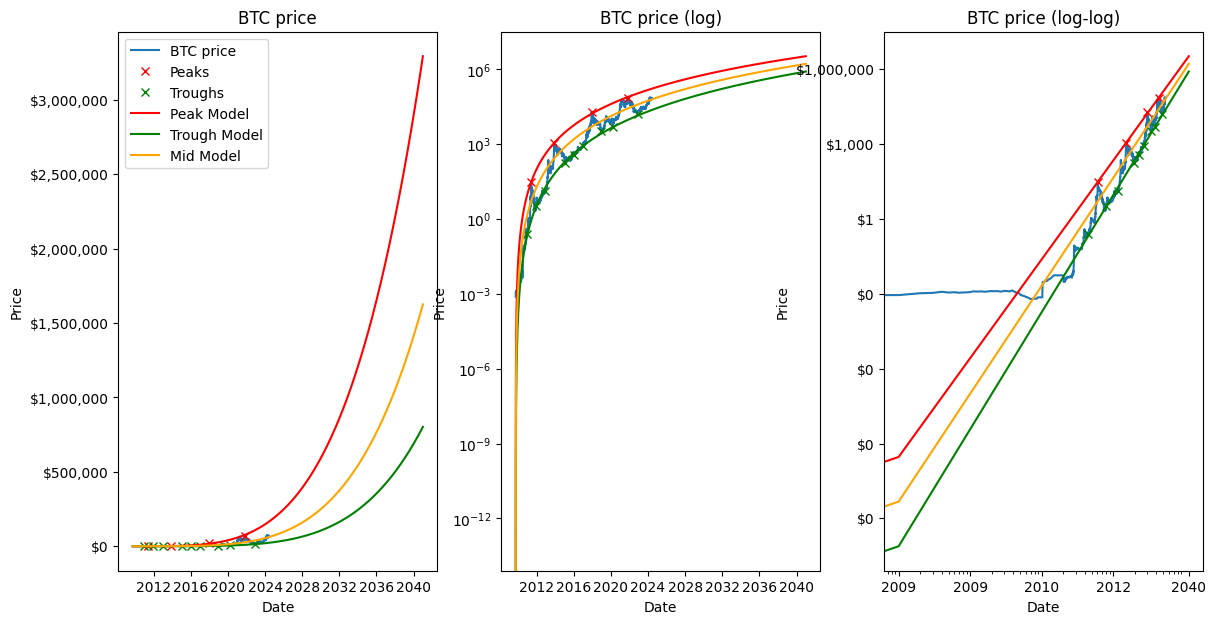

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import yfinance as yf

def get_peaks(full_data, min_year, removed_dates, d_days):
    peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
    clean_peaks = []
    for i, peak in enumerate(peaks):
        # Check if there is any higher peak in the past
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            clean_peaks.append(peak)

    # Convert the clean peaks list to a numpy array
    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2010-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    clean_peaks_after_year = clean_peaks_after_year[:-1]  # Drop the first and last peaks
    return clean_peaks_after_year

def get_troughs(full_data, min_year, removed_dates, d_days):
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        # Check if there is any lower trough in the future
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    # Convert the clean troughs list to a numpy array
    clean_troughs = np.array(clean_troughs)
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-06-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    clean_troughs_after_year = clean_troughs_after_year[:-1]  # Drop the last trough
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]

    # Convert to log-log space
    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    # Perform linear regression in log-log space
    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    # Create model prices based on fitted parameters
    full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
    full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

    # Calculate R² for peaks
    peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
    SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
    SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
    r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

    # Calculate R² for troughs
    trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
    SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
    SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
    r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)
    return peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year):
    peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)
    
    # Calculate mid model parameters
    mid_model_params = [(peak_model_params[0] + trough_model_params[0]) / 2, (peak_model_params[1] + trough_model_params[1]) / 2]

    # Extend dates to max_year
    future_dates = pd.date_range(start=full_data_after_year['date'].iloc[-1], end=str(max_year)+'-12-31', freq='D')
    future_index = range(len(full_data_after_year), len(full_data_after_year) + len(future_dates))

    # Create future model prices based on fitted parameters
    future_model_price_peaks = np.exp(peak_model_params[1]) * np.array(future_index) ** peak_model_params[0]
    future_model_price_troughs = np.exp(trough_model_params[1]) * np.array(future_index) ** trough_model_params[0]
    future_model_price_mid = np.exp(mid_model_params[1]) * np.array(future_index) ** mid_model_params[0]

    # Combine past and future data for plotting
    combined_dates = pd.concat([full_data_after_year['date'], pd.Series(future_dates)])
    combined_model_price_peaks = np.concatenate([full_data_after_year['model_price_peaks'], future_model_price_peaks])
    combined_model_price_troughs = np.concatenate([full_data_after_year['model_price_troughs'], future_model_price_troughs])
    combined_model_price_mid = np.concatenate([np.exp(mid_model_params[1]) * full_data_after_year.index ** mid_model_params[0], future_model_price_mid])

    # Print model parameters and R²
    print('Peak Model Parameters:', peak_model_params)
    print('Trough Model Parameters:', trough_model_params)
    print(f'R² for Peaks: {r2_peaks:.4f}')
    print(f'R² for Troughs: {r2_troughs:.4f}')

    # Predicted prices at max_year
    max_year_index = len(combined_dates) - 1
    predicted_peak_price = combined_model_price_peaks[max_year_index]
    predicted_mid_price = combined_model_price_mid[max_year_index]
    predicted_trough_price = combined_model_price_troughs[max_year_index]
    print(f'Predicted Peak Price in {max_year}: ${predicted_peak_price:,.0f}')
    print(f'Predicted Mid Price in {max_year}: ${predicted_mid_price:,.0f}')
    print(f'Predicted Trough Price in {max_year}: ${predicted_trough_price:,.0f}')

    # Plotting the data with the clean peaks and troughs and the model prices
    fig, axs = plt.subplots(1, 3, figsize=(14, 7))

    # Original price
    axs[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')

    # Peaks and troughs
    axs[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axs[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')

    # Model prices
    axs[0].plot(combined_dates, combined_model_price_peaks, color='red', label='Peak Model')
    axs[0].plot(combined_dates, combined_model_price_troughs, color='green', label='Trough Model')
    axs[0].plot(combined_dates, combined_model_price_mid, color='orange', label='Mid Model')

    # Labels and formatting
    axs[0].set_title('BTC price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axs[0].legend()

    # Log scale
    axs[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axs[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[1].plot(combined_dates, combined_model_price_peaks, color='red')
    axs[1].plot(combined_dates, combined_model_price_troughs, color='green')
    axs[1].plot(combined_dates, combined_model_price_mid, color='orange')
    axs[1].set_title('BTC price (log)')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price')
    axs[1].set_yscale('log')

    # Log-log scale
    axs[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axs[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_peaks, color='red')
    axs[2].plot(range(len(combined_dates)), combined_model_price_troughs, color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_mid, color='orange')
    axs[2].set_title('BTC price (log-log)')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Price')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    max_index = len(combined_dates) - 1
    axs[2].set_xticks([1, 10, 100, 1000, max_index])
    axs[2].set_xticklabels([full_data_after_year['date'][1].year, full_data_after_year['date'][10].year, full_data_after_year['date'][100].year, full_data_after_year['date'][1000].year, combined_dates.iloc[max_index].year])
    axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

    plt.show()

def load_data():
    # Load data
    historical_data_btc = pd.read_csv('historical_btc.csv')
    historical_data_btc['date'] = pd.to_datetime(historical_data_btc['date'])
    last_date = historical_data_btc['date'].max()
    new_data_btc = yf.download('BTC-USD', start=last_date)
    new_data_btc = new_data_btc.reset_index()
    new_data_btc = new_data_btc[['Date', 'Close']]
    new_data_btc.columns = ['date', 'btc_price']
    full_data = pd.concat([historical_data_btc, new_data_btc], axis=0)
    full_data = full_data.sort_values('date')
    # we reset the index
    full_data = full_data.reset_index(drop=False)
    full_data['date'] = pd.to_datetime(full_data['date'])   
    max_date = full_data['date'].max()
    print('Max date loaded:', max_date)
    return full_data


min_year = 2005
d_days = 365
max_year = 2040

full_data = load_data()
full_data_after_year = full_data[full_data['date'].dt.year > min_year]
removed_dates = full_data[full_data['date'].dt.year <= min_year].shape[0]

# Get peaks and troughs
clean_peaks_after_year = get_peaks(full_data, min_year, removed_dates, d_days)
clean_troughs_after_year = get_troughs(full_data, min_year, removed_dates, d_days)

# Generate figure
get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year)


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Max date loaded: 2024-05-26 00:00:00


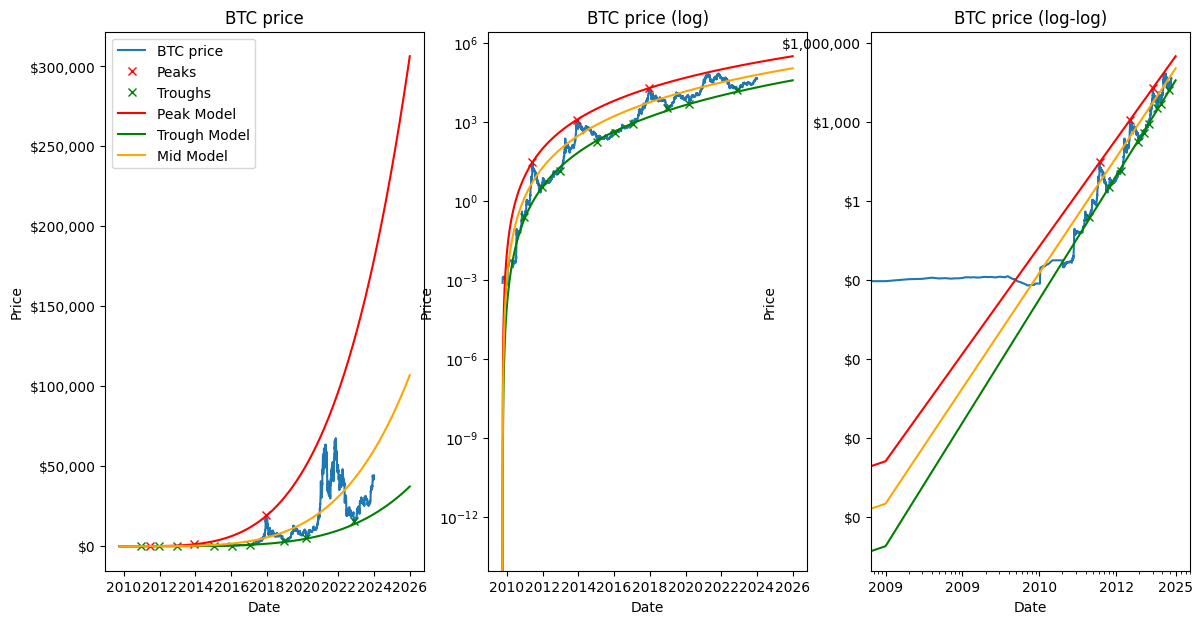

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import yfinance as yf

def get_peaks(full_data, min_year, removed_dates, d_days):
    peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
    clean_peaks = []
    for i, peak in enumerate(peaks):
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            clean_peaks.append(peak)

    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2010-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    clean_peaks_after_year = clean_peaks_after_year[:-1]
    return clean_peaks_after_year

def get_troughs(full_data, min_year, removed_dates, d_days):
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    clean_troughs = np.array(clean_troughs)
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-06-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    clean_troughs_after_year = clean_troughs_after_year[:-1]
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]

    if len(peak_dates) < 2 or len(trough_dates) < 2:
        full_data_after_year['model_price_peaks'] = np.nan
        full_data_after_year['model_price_troughs'] = np.nan
        return None, None, None, None, peak_prices, trough_prices

    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
    full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

    peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
    SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
    SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
    r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

    trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
    SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
    SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
    r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)
    return peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=None):
    params = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)
    if params[0] is None or params[1] is None:
        for ax_i in ax:
            ax_i.clear()
        return ax
    peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices = params
    
    mid_model_params = [(peak_model_params[0] + trough_model_params[0]) / 2, (peak_model_params[1] + trough_model_params[1]) / 2]

    future_dates = pd.date_range(start=full_data_after_year['date'].iloc[-1], end=str(max_year)+'-12-31', freq='D')
    future_index = range(len(full_data_after_year), len(full_data_after_year) + len(future_dates))

    future_model_price_peaks = np.exp(peak_model_params[1]) * np.array(future_index) ** peak_model_params[0]
    future_model_price_troughs = np.exp(trough_model_params[1]) * np.array(future_index) ** trough_model_params[0]
    future_model_price_mid = np.exp(mid_model_params[1]) * np.array(future_index) ** mid_model_params[0]

    combined_dates = pd.concat([full_data_after_year['date'], pd.Series(future_dates)])
    combined_model_price_peaks = np.concatenate([full_data_after_year['model_price_peaks'], future_model_price_peaks])
    combined_model_price_troughs = np.concatenate([full_data_after_year['model_price_troughs'], future_model_price_troughs])
    combined_model_price_mid = np.concatenate([np.exp(mid_model_params[1]) * full_data_after_year.index ** mid_model_params[0], future_model_price_mid])

    if ax is None:
        fig, axs = plt.subplots(1, 3, figsize=(14, 7))
    else:
        fig, axs = plt.gcf(), ax

    for ax_i in axs:
        ax_i.clear()

    axs[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')
    axs[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axs[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')
    axs[0].plot(combined_dates, combined_model_price_peaks, color='red', label='Peak Model')
    axs[0].plot(combined_dates, combined_model_price_troughs, color='green', label='Trough Model')
    axs[0].plot(combined_dates, combined_model_price_mid, color='orange', label='Mid Model')
    axs[0].set_title('BTC price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axs[0].legend()

    axs[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axs[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[1].plot(combined_dates, combined_model_price_peaks, color='red')
    axs[1].plot(combined_dates, combined_model_price_troughs, color='green')
    axs[1].plot(combined_dates, combined_model_price_mid, color='orange')
    axs[1].set_title('BTC price (log)')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price')
    axs[1].set_yscale('log')

    axs[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axs[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_peaks, color='red')
    axs[2].plot(range(len(combined_dates)), combined_model_price_troughs, color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_mid, color='orange')
    axs[2].set_title('BTC price (log-log)')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Price')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    max_index = len(combined_dates) - 1
    axs[2].set_xticks([1, 10, 100, 1000, max_index])
    axs[2].set_xticklabels([full_data_after_year['date'][1].year, full_data_after_year['date'][10].year, full_data_after_year['date'][100].year, full_data_after_year['date'][1000].year, combined_dates.iloc[max_index].year])
    axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

    return fig, axs

def load_data():
    historical_data_btc = pd.read_csv('historical_btc.csv')
    historical_data_btc['date'] = pd.to_datetime(historical_data_btc['date'])
    last_date = historical_data_btc['date'].max()
    new_data_btc = yf.download('BTC-USD', start=last_date)
    new_data_btc = new_data_btc.reset_index()
    new_data_btc = new_data_btc[['Date', 'Close']]
    new_data_btc.columns = ['date', 'btc_price']
    full_data = pd.concat([historical_data_btc, new_data_btc], axis=0)
    full_data = full_data.sort_values('date')
    full_data = full_data.reset_index(drop=False)
    full_data['date'] = pd.to_datetime(full_data['date'])
    max_date = full_data['date'].max()
    print('Max date loaded:', max_date)
    return full_data

def animate(i, full_data, min_year, d_days, max_year, axs, min_year_ani):
    current_date = pd.Timestamp(f'{min_year_ani}-01-01') + pd.DateOffset(months=i)
    full_data_until_now = full_data[full_data['date'] <= current_date]
    full_data_after_year = full_data_until_now[full_data_until_now['date'].dt.year > min_year]
    removed_dates = full_data_until_now[full_data_until_now['date'].dt.year <= min_year].shape[0]

    clean_peaks_after_year = get_peaks(full_data_until_now, min_year, removed_dates, d_days)
    clean_troughs_after_year = get_troughs(full_data_until_now, min_year, removed_dates, d_days)

    axs = get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=axs)
    return axs

min_year_params = 2005
min_year_ani = 2021
d_days = 365
max_year = 2025
max_year_ani = 2024

full_data = load_data()

fig, axs = plt.subplots(1, 3, figsize=(14, 7))
ani = FuncAnimation(fig, animate, frames=range(0, (max_year_ani-min_year_ani)*12 + 1), fargs=(full_data, min_year_params, d_days, max_year, axs, min_year_ani), interval=6)

ani.save('btc_price_animation.gif', writer=PillowWriter(fps=1))

plt.show()


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Max date loaded: 2024-05-26 00:00:00
Animating frame 0
Current date: 2015-01-01 00:00:00
Full data max: 2015-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 0
Current date: 2015-01-01 00:00:00
Full data max: 2015-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 6
Current date: 2015-07-01 00:00:00
Full data max: 2015-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 12
Current date: 2016-01-01 00:00:00
Full data max: 2016-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 18
Current date: 2016-07-01 00:00:00
Full data max: 2016-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 24
Current date: 2017-01-01 00:00:00
Full data max: 2017-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 30
Current date: 2017-07-01 00:00:00
Full data max: 2017-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 36
Current date: 2018-01-01 00:00:00
Full data max: 2018-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 42
Current date: 2018-07-01 00:00:00
F

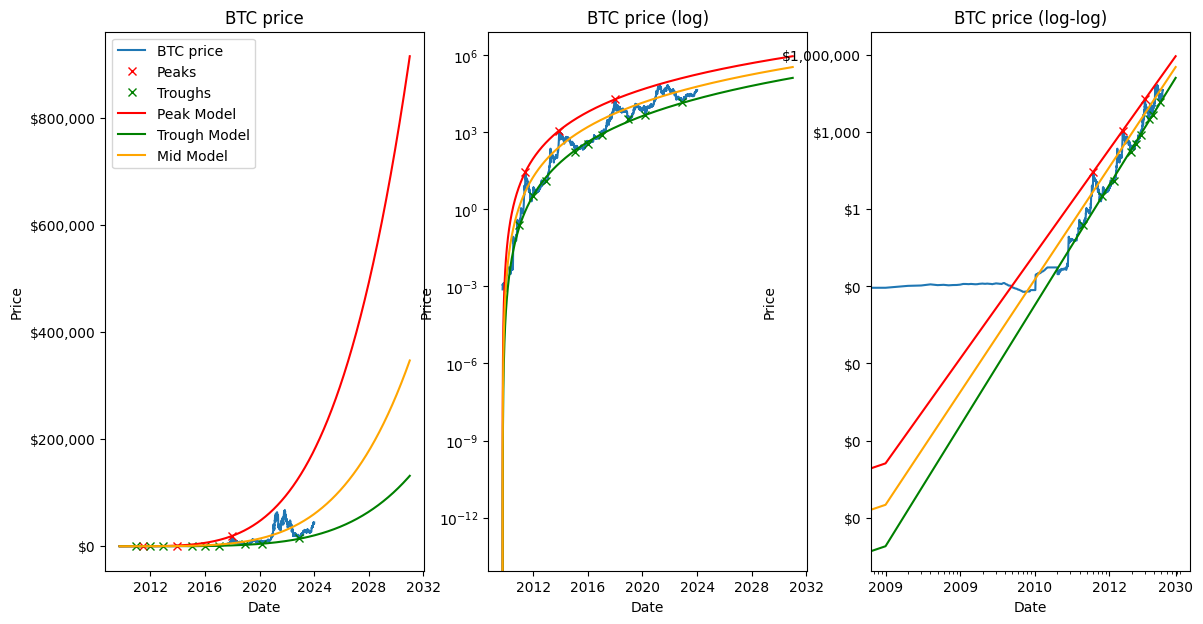

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import yfinance as yf

def get_peaks(full_data, min_year, removed_dates, d_days):
    peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
    clean_peaks = []
    for i, peak in enumerate(peaks):
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            clean_peaks.append(peak)

    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2010-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    clean_peaks_after_year = clean_peaks_after_year[:-1]
    return clean_peaks_after_year

def get_troughs(full_data, min_year, removed_dates, d_days):
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    clean_troughs = np.array(clean_troughs)
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-06-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    clean_troughs_after_year = clean_troughs_after_year[:-1]
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]

    if len(peak_dates) < 2 or len(trough_dates) < 2:
        full_data_after_year['model_price_peaks'] = np.nan
        full_data_after_year['model_price_troughs'] = np.nan
        return None, None, None, None, peak_prices, trough_prices

    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
    full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

    peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
    SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
    SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
    r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

    trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
    SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
    SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
    r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)
    return peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=None):
    params = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)
    if params[0] is None or params[1] is None:
        for ax_i in ax:
            ax_i.clear()
        return ax
    peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices = params
    
    mid_model_params = [(peak_model_params[0] + trough_model_params[0]) / 2, (peak_model_params[1] + trough_model_params[1]) / 2]

    future_dates = pd.date_range(start=full_data_after_year['date'].iloc[-1], end=str(max_year)+'-12-31', freq='D')
    future_index = range(len(full_data_after_year), len(full_data_after_year) + len(future_dates))

    future_model_price_peaks = np.exp(peak_model_params[1]) * np.array(future_index) ** peak_model_params[0]
    future_model_price_troughs = np.exp(trough_model_params[1]) * np.array(future_index) ** trough_model_params[0]
    future_model_price_mid = np.exp(mid_model_params[1]) * np.array(future_index) ** mid_model_params[0]

    combined_dates = pd.concat([full_data_after_year['date'], pd.Series(future_dates)])
    combined_model_price_peaks = np.concatenate([full_data_after_year['model_price_peaks'], future_model_price_peaks])
    combined_model_price_troughs = np.concatenate([full_data_after_year['model_price_troughs'], future_model_price_troughs])
    combined_model_price_mid = np.concatenate([np.exp(mid_model_params[1]) * full_data_after_year.index ** mid_model_params[0], future_model_price_mid])

    if ax is None:
        fig, axs = plt.subplots(1, 3, figsize=(14, 7))
    else:
        fig, axs = plt.gcf(), ax

    for ax_i in axs:
        ax_i.clear()

    axs[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')
    axs[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axs[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')
    axs[0].plot(combined_dates, combined_model_price_peaks, color='red', label='Peak Model')
    axs[0].plot(combined_dates, combined_model_price_troughs, color='green', label='Trough Model')
    axs[0].plot(combined_dates, combined_model_price_mid, color='orange', label='Mid Model')
    axs[0].set_title('BTC price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axs[0].legend()

    axs[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axs[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[1].plot(combined_dates, combined_model_price_peaks, color='red')
    axs[1].plot(combined_dates, combined_model_price_troughs, color='green')
    axs[1].plot(combined_dates, combined_model_price_mid, color='orange')
    axs[1].set_title('BTC price (log)')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price')
    axs[1].set_yscale('log')

    axs[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axs[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_peaks, color='red')
    axs[2].plot(range(len(combined_dates)), combined_model_price_troughs, color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_mid, color='orange')
    axs[2].set_title('BTC price (log-log)')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Price')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    max_index = len(combined_dates) - 1
    axs[2].set_xticks([1, 10, 100, 1000, max_index])
    axs[2].set_xticklabels([full_data_after_year['date'][1].year, full_data_after_year['date'][10].year, full_data_after_year['date'][100].year, full_data_after_year['date'][1000].year, combined_dates.iloc[max_index].year])
    axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

    return fig, axs

def load_data():
    historical_data_btc = pd.read_csv('historical_btc.csv')
    historical_data_btc['date'] = pd.to_datetime(historical_data_btc['date'])
    last_date = historical_data_btc['date'].max()
    new_data_btc = yf.download('BTC-USD', start=last_date)
    new_data_btc = new_data_btc.reset_index()
    new_data_btc = new_data_btc[['Date', 'Close']]
    new_data_btc.columns = ['date', 'btc_price']
    full_data = pd.concat([historical_data_btc, new_data_btc], axis=0)
    full_data = full_data.sort_values('date')
    full_data = full_data.reset_index(drop=False)
    full_data['date'] = pd.to_datetime(full_data['date'])
    max_date = full_data['date'].max()
    print('Max date loaded:', max_date)
    return full_data

def animate(i, full_data, min_year, d_days, max_year, axs, min_year_ani):
    print('Animating frame', i)
    current_date = pd.Timestamp(f'{min_year_ani}-01-01') + pd.DateOffset(months=i)
    print('Current date:', current_date)
    full_data_until_now = full_data[full_data['date'] <= current_date]
    full_data_after_year = full_data_until_now[full_data_until_now['date'].dt.year > min_year]
    

    max_d = full_data_after_year['date'].max()
    min_d = full_data_after_year['date'].min()
    print(f'Full data max: {max_d}, min: {min_d}')
    removed_dates = full_data_until_now[full_data_until_now['date'].dt.year <= min_year].shape[0]

    clean_peaks_after_year = get_peaks(full_data_until_now, min_year, removed_dates, d_days)
    clean_troughs_after_year = get_troughs(full_data_until_now, min_year, removed_dates, d_days)

    axs = get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=axs)
    return axs

min_year_params = 2005
min_year_ani = 2015
d_days = 365
max_year = 2030
max_year_ani = 2024

full_data = load_data()

fig, axs = plt.subplots(1, 3, figsize=(14, 7))
ani = FuncAnimation(fig, animate, frames=range(0, (max_year_ani-min_year_ani)*12 + 1,6), fargs=(full_data, min_year_params, d_days, max_year, axs, min_year_ani), interval=200)

ani.save('btc_price_animation.gif', writer=PillowWriter(fps=3))

plt.show()


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Max date loaded: 2024-05-27 00:00:00
Animating frame 0
Current date: 2014-01-01 00:00:00
Full data max: 2014-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 0
Current date: 2014-01-01 00:00:00
Full data max: 2014-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 6
Current date: 2014-07-01 00:00:00
Full data max: 2014-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 12
Current date: 2015-01-01 00:00:00
Full data max: 2015-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 18
Current date: 2015-07-01 00:00:00
Full data max: 2015-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 24
Current date: 2016-01-01 00:00:00
Full data max: 2016-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 30
Current date: 2016-07-01 00:00:00
Full data max: 2016-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 36
Current date: 2017-01-01 00:00:00
Full data max: 2017-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 42
Current date: 2017-07-01 00:00:00
F

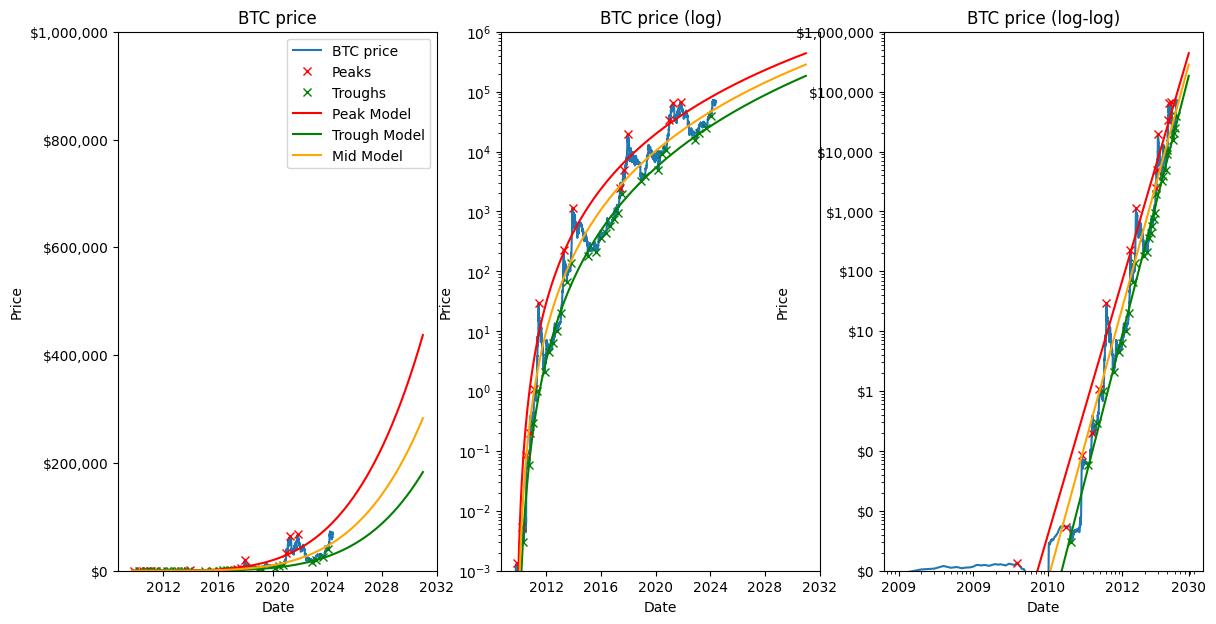

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.signal import find_peaks
import yfinance as yf

def get_peaks(full_data, min_year, removed_dates, d_days):
    peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
    clean_peaks = []
    for i, peak in enumerate(peaks):
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            clean_peaks.append(peak)

    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2009-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    clean_peaks_after_year = clean_peaks_after_year[:-1]
    return clean_peaks_after_year

def get_troughs(full_data, min_year, removed_dates, d_days):
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    clean_troughs = np.array(clean_troughs)
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-01-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    clean_troughs_after_year = clean_troughs_after_year[:-1]
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]

    if len(peak_dates) < 2 or len(trough_dates) < 2:
        full_data_after_year['model_price_peaks'] = np.nan
        full_data_after_year['model_price_troughs'] = np.nan
        return None, None, None, None, peak_prices, trough_prices

    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
    full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

    peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
    SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
    SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
    r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

    trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
    SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
    SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
    r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)
    return peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=None):
    params = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)
    if params[0] is None or params[1] is None:
        for ax_i in ax:
            ax_i.clear()
        return ax
    peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices = params
    
    mid_model_params = [(peak_model_params[0] + trough_model_params[0]) / 2, (peak_model_params[1] + trough_model_params[1]) / 2]

    future_dates = pd.date_range(start=full_data_after_year['date'].iloc[-1], end=str(max_year)+'-12-31', freq='D')
    future_index = range(len(full_data_after_year), len(full_data_after_year) + len(future_dates))

    future_model_price_peaks = np.exp(peak_model_params[1]) * np.array(future_index) ** peak_model_params[0]
    future_model_price_troughs = np.exp(trough_model_params[1]) * np.array(future_index) ** trough_model_params[0]
    future_model_price_mid = np.exp(mid_model_params[1]) * np.array(future_index) ** mid_model_params[0]

    combined_dates = pd.concat([full_data_after_year['date'], pd.Series(future_dates)])
    combined_model_price_peaks = np.concatenate([full_data_after_year['model_price_peaks'], future_model_price_peaks])
    combined_model_price_troughs = np.concatenate([full_data_after_year['model_price_troughs'], future_model_price_troughs])
    combined_model_price_mid = np.concatenate([np.exp(mid_model_params[1]) * full_data_after_year.index ** mid_model_params[0], future_model_price_mid])

    if ax is None:
        fig, axs = plt.subplots(1, 3, figsize=(14, 7))
    else:
        fig, axs = plt.gcf(), ax

    for ax_i in axs:
        ax_i.clear()

    axs[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')
    axs[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axs[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')
    axs[0].plot(combined_dates, combined_model_price_peaks, color='red', label='Peak Model')
    axs[0].plot(combined_dates, combined_model_price_troughs, color='green', label='Trough Model')
    axs[0].plot(combined_dates, combined_model_price_mid, color='orange', label='Mid Model')
    axs[0].set_title('BTC price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axs[0].legend()
    axs[0].set_ylim([0, 1000000])  # Set max for the first axis

    axs[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axs[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[1].plot(combined_dates, combined_model_price_peaks, color='red')
    axs[1].plot(combined_dates, combined_model_price_troughs, color='green')
    axs[1].plot(combined_dates, combined_model_price_mid, color='orange')
    axs[1].set_title('BTC price (log)')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price')
    axs[1].set_yscale('log')
    axs[1].set_ylim([1e-3, 1e6])  # Set log y range

    axs[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axs[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_peaks, color='red')
    axs[2].plot(range(len(combined_dates)), combined_model_price_troughs, color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_mid, color='orange')
    axs[2].set_title('BTC price (log-log)')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Price')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    axs[2].set_ylim([1e-3, 1e6])  # Set log y range
    max_index = len(combined_dates) - 1
    axs[2].set_xticks([1, 10, 100, 1000, max_index])
    axs[2].set_xticklabels([full_data_after_year['date'][1].year, full_data_after_year['date'][10].year, full_data_after_year['date'][100].year, full_data_after_year['date'][1000].year, combined_dates.iloc[max_index].year])
    axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

    return fig, axs

def load_data():
    historical_data_btc = pd.read_csv('historical_btc.csv')
    historical_data_btc['date'] = pd.to_datetime(historical_data_btc['date'])
    last_date = historical_data_btc['date'].max()
    new_data_btc = yf.download('BTC-USD', start=last_date)
    new_data_btc = new_data_btc.reset_index()
    new_data_btc = new_data_btc[['Date', 'Close']]
    new_data_btc.columns = ['date', 'btc_price']
    full_data = pd.concat([historical_data_btc, new_data_btc], axis=0)
    full_data = full_data.sort_values('date')
    full_data = full_data.reset_index(drop=False)
    full_data['date'] = pd.to_datetime(full_data['date'])
    max_date = full_data['date'].max()
    print('Max date loaded:', max_date)
    return full_data

def animate(i, full_data, min_year, d_days, max_year, axs, min_year_ani):
    print('Animating frame', i)
    current_date = pd.Timestamp(f'{min_year_ani}-01-01') + pd.DateOffset(months=i)
    print('Current date:', current_date)
    full_data_until_now = full_data[full_data['date'] <= current_date]
    full_data_after_year = full_data_until_now[full_data_until_now['date'].dt.year > min_year]
    

    max_d = full_data_after_year['date'].max()
    min_d = full_data_after_year['date'].min()
    print(f'Full data max: {max_d}, min: {min_d}')
    removed_dates = full_data_until_now[full_data_until_now['date'].dt.year <= min_year].shape[0]

    clean_peaks_after_year = get_peaks(full_data_until_now, min_year, removed_dates, d_days)
    clean_troughs_after_year = get_troughs(full_data_until_now, min_year, removed_dates, d_days)

    axs = get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=axs)
    return axs

min_year_params = 2008
min_year_ani = 2014
d_days = 100
max_year = 2030
max_year_ani = 2030

full_data = load_data()

fig, axs = plt.subplots(1, 3, figsize=(14, 7))
ani = FuncAnimation(fig, animate, frames=range(0, (max_year_ani-min_year_ani)*12 + 1,6), fargs=(full_data, min_year_params, d_days, max_year, axs, min_year_ani), interval=200)

ani.save('btc_price_animation.gif', writer=PillowWriter(fps=2))

plt.show()


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Max date loaded: 2024-05-27 00:00:00
Animating frame 0
Current date: 2014-01-01 00:00:00
Full data max: 2014-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 0
Current date: 2014-01-01 00:00:00
Full data max: 2014-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 6
Current date: 2014-07-01 00:00:00
Full data max: 2014-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 12
Current date: 2015-01-01 00:00:00
Full data max: 2015-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 18
Current date: 2015-07-01 00:00:00
Full data max: 2015-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 24
Current date: 2016-01-01 00:00:00
Full data max: 2016-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 30
Current date: 2016-07-01 00:00:00
Full data max: 2016-07-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 36
Current date: 2017-01-01 00:00:00
Full data max: 2017-01-01 00:00:00, min: 2009-10-05 00:00:00
Animating frame 42
Current date: 2017-07-01 00:00:00
F

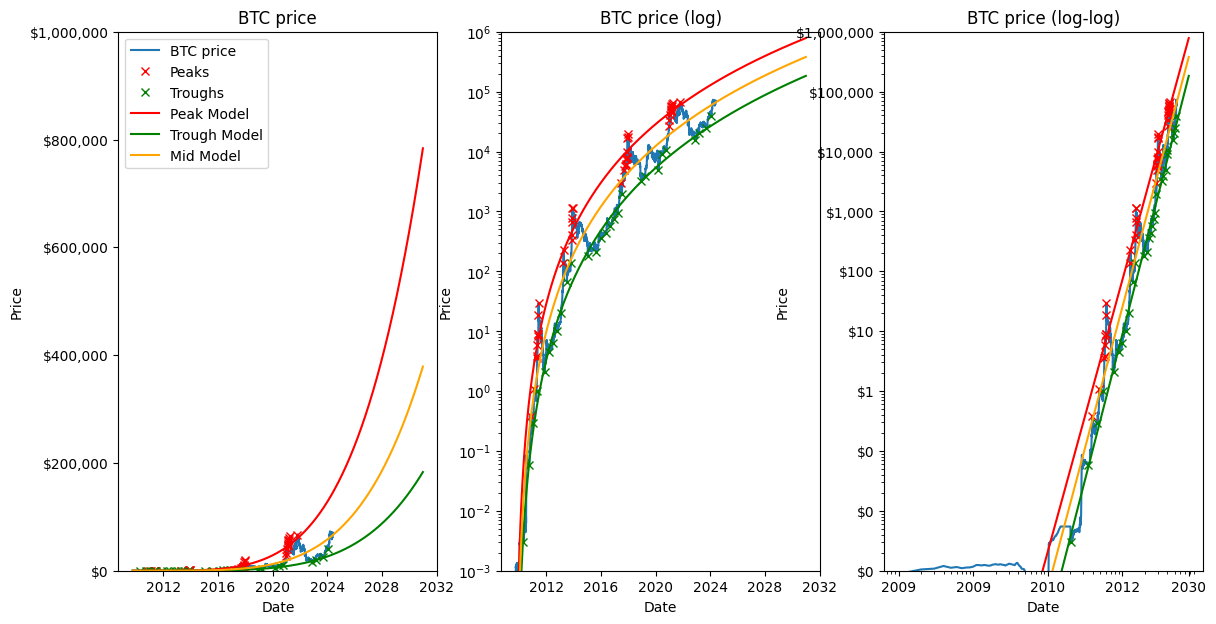

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.signal import find_peaks
import yfinance as yf


def get_peaks(full_data, min_year, removed_dates, d_days, threshold=0.35):
    peaks, _ = find_peaks(full_data['btc_price'])
    clean_peaks = []
    
    for i, peak in enumerate(peaks):
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            if peak + 1 < len(full_data):
                right_side = full_data['btc_price'][peak+1:]
                if len(right_side) > 0 and (right_side < (full_data['btc_price'][peak] * (1 - threshold))).any():
                    clean_peaks.append(peak)
    
    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2010-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    
    clean_peaks_after_year = clean_peaks_after_year[1:-1]
    return clean_peaks_after_year



def get_troughs(full_data, min_year, removed_dates, d_days):
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    clean_troughs = np.array(clean_troughs)
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-01-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    clean_troughs_after_year = clean_troughs_after_year[:-1]
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]

    if len(peak_dates) < 2 or len(trough_dates) < 2:
        full_data_after_year['model_price_peaks'] = np.nan
        full_data_after_year['model_price_troughs'] = np.nan
        return None, None, None, None, peak_prices, trough_prices

    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
    full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

    peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
    SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
    SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
    r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

    trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
    SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
    SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
    r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)
    return peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=None):
    params = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year)
    if params[0] is None or params[1] is None:
        for ax_i in ax:
            ax_i.clear()
        return ax
    peak_model_params, trough_model_params, r2_peaks, r2_troughs, peak_prices, trough_prices = params
    
    mid_model_params = [(peak_model_params[0] + trough_model_params[0]) / 2, (peak_model_params[1] + trough_model_params[1]) / 2]

    future_dates = pd.date_range(start=full_data_after_year['date'].iloc[-1], end=str(max_year)+'-12-31', freq='D')
    future_index = range(len(full_data_after_year), len(full_data_after_year) + len(future_dates))

    future_model_price_peaks = np.exp(peak_model_params[1]) * np.array(future_index) ** peak_model_params[0]
    future_model_price_troughs = np.exp(trough_model_params[1]) * np.array(future_index) ** trough_model_params[0]
    future_model_price_mid = np.exp(mid_model_params[1]) * np.array(future_index) ** mid_model_params[0]

    combined_dates = pd.concat([full_data_after_year['date'], pd.Series(future_dates)])
    combined_model_price_peaks = np.concatenate([full_data_after_year['model_price_peaks'], future_model_price_peaks])
    combined_model_price_troughs = np.concatenate([full_data_after_year['model_price_troughs'], future_model_price_troughs])
    combined_model_price_mid = np.concatenate([np.exp(mid_model_params[1]) * full_data_after_year.index ** mid_model_params[0], future_model_price_mid])

    if ax is None:
        fig, axs = plt.subplots(1, 3, figsize=(14, 7))
    else:
        fig, axs = plt.gcf(), ax

    for ax_i in axs:
        ax_i.clear()

    axs[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')
    axs[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axs[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')
    axs[0].plot(combined_dates, combined_model_price_peaks, color='red', label='Peak Model')
    axs[0].plot(combined_dates, combined_model_price_troughs, color='green', label='Trough Model')
    axs[0].plot(combined_dates, combined_model_price_mid, color='orange', label='Mid Model')
    axs[0].set_title('BTC price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axs[0].legend()
    axs[0].set_ylim([0, 1000000])  # Set max for the first axis

    axs[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axs[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[1].plot(combined_dates, combined_model_price_peaks, color='red')
    axs[1].plot(combined_dates, combined_model_price_troughs, color='green')
    axs[1].plot(combined_dates, combined_model_price_mid, color='orange')
    axs[1].set_title('BTC price (log)')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Price')
    axs[1].set_yscale('log')
    axs[1].set_ylim([1e-3, 1e6])  # Set log y range

    axs[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axs[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axs[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_peaks, color='red')
    axs[2].plot(range(len(combined_dates)), combined_model_price_troughs, color='green')
    axs[2].plot(range(len(combined_dates)), combined_model_price_mid, color='orange')
    axs[2].set_title('BTC price (log-log)')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Price')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    axs[2].set_ylim([1e-3, 1e6])  # Set log y range
    max_index = len(combined_dates) - 1
    axs[2].set_xticks([1, 10, 100, 1000, max_index])
    axs[2].set_xticklabels([full_data_after_year['date'][1].year, full_data_after_year['date'][10].year, full_data_after_year['date'][100].year, full_data_after_year['date'][1000].year, combined_dates.iloc[max_index].year])
    axs[2].yaxis.set_major_formatter('${:,.0f}'.format)

    return fig, axs

def load_data():
    historical_data_btc = pd.read_csv('historical_btc.csv')
    historical_data_btc['date'] = pd.to_datetime(historical_data_btc['date'])
    last_date = historical_data_btc['date'].max()
    new_data_btc = yf.download('BTC-USD', start=last_date)
    new_data_btc = new_data_btc.reset_index()
    new_data_btc = new_data_btc[['Date', 'Close']]
    new_data_btc.columns = ['date', 'btc_price']
    full_data = pd.concat([historical_data_btc, new_data_btc], axis=0)
    full_data = full_data.sort_values('date')
    full_data = full_data.reset_index(drop=False)
    full_data['date'] = pd.to_datetime(full_data['date'])
    max_date = full_data['date'].max()
    print('Max date loaded:', max_date)
    return full_data

def animate(i, full_data, min_year, d_days, max_year, axs, min_year_ani):
    print('Animating frame', i)
    current_date = pd.Timestamp(f'{min_year_ani}-01-01') + pd.DateOffset(months=i)
    print('Current date:', current_date)
    full_data_until_now = full_data[full_data['date'] <= current_date]
    full_data_after_year = full_data_until_now[full_data_until_now['date'].dt.year > min_year]
    

    max_d = full_data_after_year['date'].max()
    min_d = full_data_after_year['date'].min()
    print(f'Full data max: {max_d}, min: {min_d}')
    removed_dates = full_data_until_now[full_data_until_now['date'].dt.year <= min_year].shape[0]

    clean_peaks_after_year = get_peaks(full_data_until_now, min_year, removed_dates, d_days)
    clean_troughs_after_year = get_troughs(full_data_until_now, min_year, removed_dates, d_days)

    axs = get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, ax=axs)
    return axs

min_year_params = 2008
min_year_ani = 2014
d_days = 100
max_year = 2030
max_year_ani = 2030

full_data = load_data()

fig, axs = plt.subplots(1, 3, figsize=(14, 7))
ani = FuncAnimation(fig, animate, frames=range(0, (max_year_ani-min_year_ani)*12 + 1,6), fargs=(full_data, min_year_params, d_days, max_year, axs, min_year_ani), interval=200)

ani.save('btc_price_animation.gif', writer=PillowWriter(fps=2))

plt.show()


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Max date loaded: 2024-05-27 00:00:00
Animating frame 0
Current date: 2014-01-01 00:00:00
Full data max: 2014-01-01 00:00:00, min: 2009-10-05 00:00:00


IndexError: list index out of range

Animating frame 0
Current date: 2014-01-01 00:00:00
Full data max: 2014-01-01 00:00:00, min: 2009-10-05 00:00:00
Error in callback <function _draw_all_if_interactive at 0x000001EB6199DC60> (for post_execute), with arguments args (),kwargs {}:


ValueError: not enough values to unpack (expected 12, got 6)

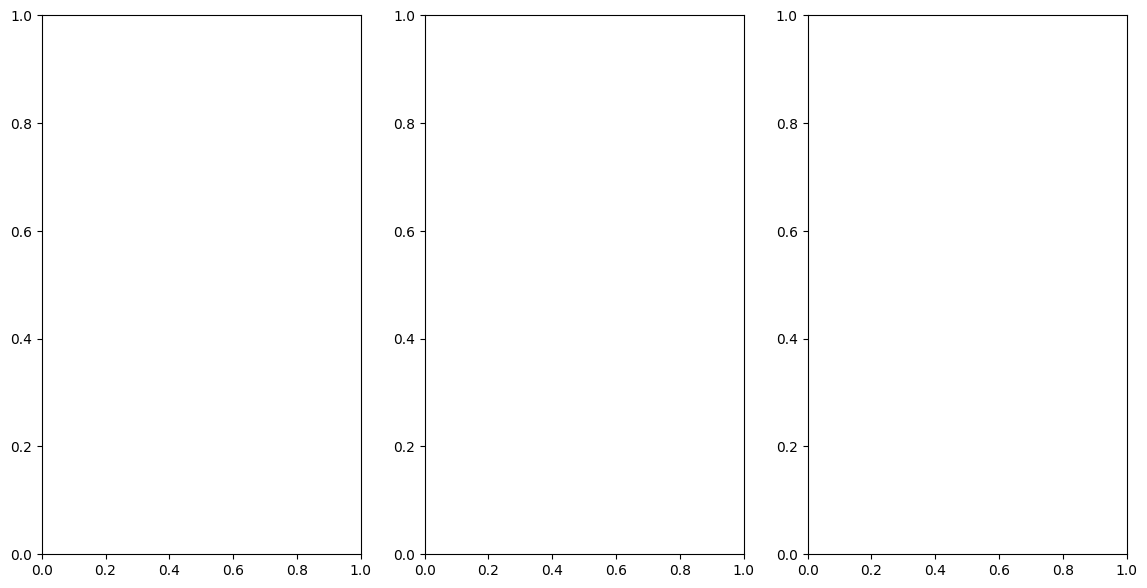

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.signal import find_peaks
import yfinance as yf

def get_peaks(full_data, min_year, removed_dates, d_days, min_decline=0.2):
    peaks, _ = find_peaks(full_data['btc_price'], distance=d_days)
    clean_peaks = []
    for i, peak in enumerate(peaks):
        if not any(full_data['btc_price'][peak] < full_data['btc_price'][past_peak] for past_peak in peaks[:i]):
            if peak + 1 < len(full_data):
                right_side = full_data['btc_price'][peak+1:]
                if len(right_side) > 0 and (right_side.max() - full_data['btc_price'][peak]) / full_data['btc_price'][peak] <= -min_decline:
                    clean_peaks.append(peak)

    clean_peaks = np.array(clean_peaks)

    if min_year <= 2009:
        clean_peaks_after_year = [peak for peak in clean_peaks if str(full_data['date'][peak]) > '2010-06-01']
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    else:
        clean_peaks_after_year = [peak for peak in clean_peaks if full_data['date'][peak].year > min_year]
        clean_peaks_after_year = [peak - removed_dates for peak in clean_peaks_after_year]
    clean_peaks_after_year = clean_peaks_after_year[1:-1]
    return clean_peaks_after_year

def get_troughs(full_data, min_year, removed_dates, d_days):
    troughs, _ = find_peaks(-full_data['btc_price'], distance=d_days)
    clean_troughs = []
    for i, trough in enumerate(troughs):
        if not any(full_data['btc_price'][trough] > full_data['btc_price'][future_trough] for future_trough in troughs[i+1:]):
            clean_troughs.append(trough)

    clean_troughs = np.array(clean_troughs)
    if min_year <= 2009:
        clean_troughs_after_year = [trough for trough in clean_troughs if str(full_data['date'][trough]) > '2010-06-01']
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]
    else:
        clean_troughs_after_year = [trough for trough in clean_troughs if full_data['date'][trough].year > min_year]
        clean_troughs_after_year = [trough - removed_dates for trough in clean_troughs_after_year]

    clean_troughs_after_year = clean_troughs_after_year[:-1]
    return clean_troughs_after_year

def get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year_ani):
    peak_dates = full_data_after_year.index[clean_peaks_after_year]
    peak_prices = full_data_after_year['btc_price'].iloc[clean_peaks_after_year]

    trough_dates = full_data_after_year.index[clean_troughs_after_year]
    trough_prices = full_data_after_year['btc_price'].iloc[clean_troughs_after_year]

    if len(peak_dates) < 2 or len(trough_dates) < 2:
        full_data_after_year['model_price_peaks'] = np.nan
        full_data_after_year['model_price_troughs'] = np.nan
        return None, None, None, None, peak_prices, trough_prices

    log_peak_dates = np.log(peak_dates)
    log_peak_prices = np.log(peak_prices)
    log_trough_dates = np.log(trough_dates)
    log_trough_prices = np.log(trough_prices)

    peak_model_params = np.polyfit(log_peak_dates, log_peak_prices, 1)
    trough_model_params = np.polyfit(log_trough_dates, log_trough_prices, 1)

    if peak_model_params[0] < 0 or trough_model_params[0] < 0:
        full_data_after_year['model_price_peaks'] = np.nan
        full_data_after_year['model_price_troughs'] = np.nan
        return None, None, None, None, None, None, peak_prices, trough_prices, None, None, None, None
    else:
        full_data_after_year['model_price_peaks'] = np.exp(peak_model_params[1]) * full_data_after_year.index ** peak_model_params[0]
        full_data_after_year['model_price_troughs'] = np.exp(trough_model_params[1]) * full_data_after_year.index ** trough_model_params[0]

        peak_predicted = np.exp(peak_model_params[1]) * peak_dates ** peak_model_params[0]
        SS_res_peaks = np.sum((peak_prices - peak_predicted) ** 2)
        SS_tot_peaks = np.sum((peak_prices - np.mean(peak_prices)) ** 2)
        r2_peaks = 1 - (SS_res_peaks / SS_tot_peaks)

        trough_predicted = np.exp(trough_model_params[1]) * trough_dates ** trough_model_params[0]
        SS_res_troughs = np.sum((trough_prices - trough_predicted) ** 2)
        SS_tot_troughs = np.sum((trough_prices - np.mean(trough_prices)) ** 2)
        r2_troughs = 1 - (SS_res_troughs / SS_tot_troughs)

        mid_model_params = [(peak_model_params[0] + trough_model_params[0]) / 2, (peak_model_params[1] + trough_model_params[1]) / 2]
        full_data_after_year['model_price_mid'] = np.exp(mid_model_params[1]) * full_data_after_year.index ** mid_model_params[0]

        mid_predicted = np.exp(mid_model_params[1]) * full_data_after_year.index ** mid_model_params[0]
        SS_res_mid = np.sum((full_data_after_year['btc_price'] - mid_predicted) ** 2)
        SS_tot_mid = np.sum((full_data_after_year['btc_price'] - np.mean(full_data_after_year['btc_price'])) ** 2)
        r2_mid = 1 - (SS_res_mid / SS_tot_mid)

        future_dates = pd.date_range(start=full_data_after_year['date'].iloc[-1], end=str(max_year_ani)+'-12-31', freq='D')
        future_index = range(len(full_data_after_year), len(full_data_after_year) + len(future_dates))

        peak_future_predicted = np.exp(peak_model_params[1]) * np.array(future_index) ** peak_model_params[0]
        trough_future_predicted = np.exp(trough_model_params[1]) * np.array(future_index) ** trough_model_params[0]
        future_mid_predicted = np.exp(mid_model_params[1]) * np.array(future_index) ** mid_model_params[0]
        print('Model params:', peak_model_params, trough_model_params, mid_model_params)
        print('R2s: Peaks:', r2_peaks, 'Troughs:', r2_troughs, 'Mid:', r2_mid)


        return peak_model_params, trough_model_params, mid_model_params, r2_peaks, r2_troughs, r2_mid, peak_prices, trough_prices, peak_future_predicted, trough_future_predicted, future_mid_predicted, future_dates

def get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, axs, min_year_params, peak_future_predicted, trough_future_predicted, future_mid_predicted, future_dates, peak_prices, trough_prices):
    future_dates_new = future_dates[~future_dates.isin(full_data_after_year['date'])]

    future_dates_df = pd.DataFrame(future_dates_new, columns=['date'])
    future_dates_df = future_dates_df.reindex(columns=full_data_after_year.columns, fill_value=np.nan)

    full_data_after_year = pd.concat([full_data_after_year, future_dates_df], axis=0).reset_index(drop=True)

    # Adjust the lengths of the future predictions to match the extended DataFrame
    future_index_len = len(full_data_after_year) - len(future_dates_new)
    peak_future_predicted = np.concatenate([full_data_after_year['model_price_peaks'].dropna().values, peak_future_predicted])
    trough_future_predicted = np.concatenate([full_data_after_year['model_price_troughs'].dropna().values, trough_future_predicted])
    future_mid_predicted = np.concatenate([full_data_after_year['model_price_mid'].dropna().values, future_mid_predicted])

    if axs is None:
        fig, axes = plt.subplots(1, 3, figsize=(14, 7))
    else:
        fig, axes = plt.gcf(), axs

    for ax_i in axes:
        ax_i.clear()

    axes[0].plot(full_data_after_year['date'], full_data_after_year['btc_price'], label='BTC price')
    axes[0].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red', label='Peaks')
    axes[0].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green', label='Troughs')
    axes[0].plot(full_data_after_year['date'], peak_future_predicted[:-1], color='red', label='Peak Model')
    axes[0].plot(full_data_after_year['date'], trough_future_predicted[:-1], color='green', label='Trough Model')
    axes[0].plot(full_data_after_year['date'], future_mid_predicted[:-1], color='orange', label='Mid Model')
    axes[0].set_title('BTC price')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Price')
    axes[0].yaxis.set_major_formatter('${:,.0f}'.format)
    axes[0].legend()
    axes[0].set_ylim([0, 1000000])

    axes[1].plot(full_data_after_year['date'], full_data_after_year['btc_price'])
    axes[1].plot(full_data_after_year['date'].iloc[clean_peaks_after_year], peak_prices, "x", color='red')
    axes[1].plot(full_data_after_year['date'].iloc[clean_troughs_after_year], trough_prices, "x", color='green')
    axes[1].plot(full_data_after_year['date'], peak_future_predicted[:-1], color='red')
    axes[1].plot(full_data_after_year['date'], trough_future_predicted[:-1], color='green')
    axes[1].plot(full_data_after_year['date'], future_mid_predicted[:-1], color='orange')
    axes[1].set_title('BTC price (log)')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Price')
    axes[1].set_yscale('log')
    axes[1].set_ylim([1e-3, 1e6])

    axes[2].plot(full_data_after_year.index, full_data_after_year['btc_price'])
    axes[2].plot(full_data_after_year.index[clean_peaks_after_year], peak_prices, "x", color='red')
    axes[2].plot(full_data_after_year.index[clean_troughs_after_year], trough_prices, "x", color='green')
    axes[2].plot(full_data_after_year.index, peak_future_predicted[:-1], color='red')
    axes[2].plot(full_data_after_year.index, trough_future_predicted[:-1], color='green')
    axes[2].plot(full_data_after_year.index, future_mid_predicted[:-1], color='orange')
    axes[2].set_title('BTC price (log-log)')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Price')
    axes[2].set_yscale('log')
    axes[2].set_xscale('log')
    axes[2].set_ylim([1e-3, 1e6])
    max_index = len(full_data_after_year) - 1
    axes[2].set_xticks([1, 10, 100, 1000, max_index])
    axes[2].set_xticklabels([full_data_after_year['date'].iloc[1].year, full_data_after_year['date'].iloc[10].year, full_data_after_year['date'].iloc[100].year, full_data_after_year['date'].iloc[1000].year, full_data_after_year['date'].iloc[max_index].year])
    axes[2].yaxis.set_major_formatter('${:,.0f}'.format)

    return fig, axes

def load_data():
    historical_data_btc = pd.read_csv('historical_btc.csv')
    historical_data_btc['date'] = pd.to_datetime(historical_data_btc['date'])
    last_date = historical_data_btc['date'].max()
    new_data_btc = yf.download('BTC-USD', start=last_date)
    new_data_btc = new_data_btc.reset_index()
    new_data_btc = new_data_btc[['Date', 'Close']]
    new_data_btc.columns = ['date', 'btc_price']
    full_data = pd.concat([historical_data_btc, new_data_btc], axis=0)
    full_data = full_data.sort_values('date')
    full_data = full_data.reset_index(drop=False)
    full_data['date'] = pd.to_datetime(full_data['date'])
    max_date = full_data['date'].max()
    print('Max date loaded:', max_date)
    return full_data

def animate(i, full_data, min_year, d_days, max_year, axs, min_year_ani):
    print('Animating frame', i)
    current_date = pd.Timestamp(f'{min_year_ani}-01-01') + pd.DateOffset(months=i)
    print('Current date:', current_date)
    full_data_until_now = full_data[full_data['date'] <= current_date]
    full_data_after_year = full_data_until_now[full_data_until_now['date'].dt.year > min_year]

    max_d = full_data_after_year['date'].max()
    min_d = full_data_after_year['date'].min()
    print(f'Full data max: {max_d}, min: {min_d}')
    removed_dates = full_data_until_now[full_data_until_now['date'].dt.year <= min_year].shape[0]

    clean_peaks_after_year = get_peaks(full_data_until_now, min_year, removed_dates, d_days)
    clean_troughs_after_year = get_troughs(full_data_until_now, min_year, removed_dates, d_days)

    peak_model_params, trough_model_params, mid_model_params, r2_peaks, r2_troughs, r2_mid, peak_prices, trough_prices, peak_future_predicted, trough_future_predicted, future_mid_predicted, future_dates = get_params_and_r2(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year_ani)

    axs = get_figure(full_data_after_year, clean_peaks_after_year, clean_troughs_after_year, max_year, axs, min_year_params, peak_future_predicted, trough_future_predicted, future_mid_predicted, future_dates, peak_prices, trough_prices)

    # Add current date, model parameters, and projection for 2030 to the plot
    if mid_model_params is not None:
        print('Adding annotation, with model params:', mid_model_params)
        projection_2030 = np.exp(mid_model_params[1]) * (2030 - min_year_params) ** mid_model_params[0]
        annotation_text = (
            f"Current Date: {current_date.strftime('%Y-%m-%d')}\n"
            f"Model Params: {mid_model_params[0]:.4f}, {mid_model_params[1]:.4f}\n"
            f"Projection for 2030: ${projection_2030:,.0f}"
            f"R2 Peaks: {r2_peaks:.4f}\n"
            f"R2 Troughs: {r2_troughs:.4f}"
        )
        print('Annotation text:', annotation_text)
        if axs is not None:
            try:
                axs[2].annotate(annotation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10,
                            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
            except Exception as e:
                print(f'Annotation error: {e}')

    return axs

min_year_params = 2005
min_year_ani = 2014
d_days = 100
max_year = 2040
max_year_ani = 2040

full_data = load_data()

fig, axs = plt.subplots(1, 3, figsize=(14, 7))
ani = FuncAnimation(fig, animate, frames=range(0, (max_year_ani - min_year_ani) * 12 + 1, 12), fargs=(full_data, min_year_params, d_days, max_year, axs, min_year_ani), interval=200)

ani.save('btc_price_animation.gif', writer=PillowWriter(fps=1))

plt.show()

